# Исследование аварийной ситуации в Нижнем Новгороде

## Цель исследования:
Исследовать, как можно улучшить ситуацию с авариями в Нижнем Новгороде.
## Задачи исследования:
1. Изучить данные.
2. Выбрать изучаемый город.
3. Обработать пропуски.
4. Отобразить границы районов.
5. Отобразить все аварии на карте.
6. Обработать форматы данных, которые не являются табличными.
7. Изучить и исследовать данные:
 - Когда чаще всего случаются аварии?
 - В каких районах, в какое время суток?
 - Кто чаще всего страдает от аварий?
 - Предпопложить возможные причины большого или маленького количества аварий
 - Провести исследование: как можно улучшить ситуацию с авриями, можно ли уменьшить их количество или как-то иначе повзаимодействовать в плане решения этого и других вопросов.
 - Прийти к конкретному выводу о пользе полученных данных и проведенному анализу.
 - Выявить болезненные точки и найти способ улучшить ситуацию как на дорогах, так и в конкретных ситуациях, имеющих определенные закономерности путем анализа существующих данных.
8. Построить графики и визуализации , раскрывающие тему.
9. Провести дополнительное исследование для доказательства или опровержения  сделанных выводов.
10. Написать общий вывод , раскрывающих разные стороны вопроса по существующим проблемам.

Поключим библиотеки, выберем объект изучения и обработаем данные от пропусков с помощью работы с geolocator.reverse.

In [1]:
import geopandas as gpd
import numpy as np
from geopy.geocoders import Nominatim
from shapely.geometry import Polygon
import json
import requests
import pandas as pd
import folium
from folium import Map, Marker
from folium.plugins import MarkerCluster
from pandas import json_normalize
import plotly.graph_objects as go
import plotly.express as px
import math
import datashader as ds
from datashader.bundling import connect_edges, hammer_bundle
import datashader.transfer_functions as tf
from matplotlib import pyplot as plt
%matplotlib inline
from shapely.geometry import Polygon

In [2]:
df = gpd.read_file('nizhegorodskaia-oblast.geojson')

In [3]:
df = df.query('region == "Нижний новгород" ')
df

,id,tags,light,point,nearby,region,scheme,address,weather,category,...,severity,vehicles,dead_count,participants,injured_count,parent_region,road_conditions,participants_count,participant_categories,geometry
1302,2767224,[Дорожно-транспортные происшествия],Светлое время суток,"{'lat': 56.267255, 'long': 43.914639}","[ ""Мост, эстакада, путепровод"", ""Административ...",Нижний новгород,110,"г Нижний Новгород, пр-кт Ленина, 70",[Ясно],Столкновение,...,Легкий,"[ { ""year"": 2007, ""brand"": ""RENAULT"", ""color"":...",0,[ ],2,Нижегородская область,[Сухое],4,[Все участники],POINT (43.91464 56.26725)
1303,2767288,[Дорожно-транспортные происшествия],"В темное время суток, освещение включено","{'lat': 56.232635, 'long': 43.854986}","[ ""Многоквартирные жилые дома"", ""Регулируемый ...",Нижний новгород,780,"г Нижний Новгород, ул Лескова, 48",[Пасмурно],Наезд на пешехода,...,Легкий,"[ { ""year"": 2007, ""brand"": ""VOLVO"", ""color"": ""...",0,"[ { ""role"": ""Пешеход"", ""gender"": ""Женский"", ""v...",1,Нижегородская область,[Мокрое],2,"[Пешеходы, Все участники]",POINT (43.85499 56.23264)
1304,2767298,[Дорожно-транспортные происшествия],Светлое время суток,"{'lat': 56.229636, 'long': 43.963766}","[ ""Жилые дома индивидуальной застройки"" ]",Нижний новгород,830,"г Нижний Новгород, ул Маршала Голованова, 9",[Ясно],Наезд на пешехода,...,Легкий,"[ { ""year"": 2010, ""brand"": ""HYUNDAI"", ""color"":...",0,"[ { ""role"": ""Пешеход"", ""gender"": ""Женский"", ""v...",1,Нижегородская область,[Сухое],2,"[Пешеходы, Все участники]",POINT (43.96377 56.22964)
1305,2767296,[Дорожно-транспортные происшествия],Светлое время суток,"{'lat': 56.339082, 'long': 43.84488}","[ ""Регулируемый перекресток"", ""Регулируемый пе...",Нижний новгород,NaN,"г Нижний Новгород, ул Циолковского, 29",[Ясно],Наезд на пешехода,...,Легкий,"[ { ""year"": 2008, ""brand"": ""TOYOTA"", ""color"": ...",0,"[ { ""role"": ""Пешеход"", ""gender"": ""Мужской"", ""v...",1,Нижегородская область,"[Иные недостатки, Мокрое]",2,"[Пешеходы, Все участники]",POINT (43.84488 56.33908)
1306,2767299,[Дорожно-транспортные происшествия],Светлое время суток,"{'lat': 56.287917, 'long': 43.981383}","[ ""АЗС"", ""Регулируемый перекресток"" ]",Нижний новгород,820,"г Нижний Новгород, пр-кт Гагарина, 58",[Ясно],Наезд на пешехода,...,Легкий,"[ { ""year"": 2006, ""brand"": ""ГАЗ"", ""color"": ""Се...",0,"[ { ""role"": ""Пешеход"", ""gender"": ""Мужской"", ""v...",1,Нижегородская область,[Сухое],2,"[Пешеходы, Все участники]",POINT (43.98138 56.28792)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17645,2013263,"[Дорожно-транспортные происшествия, ДТП и пост...",Светлое время суток,"{'lat': 56.339795, 'long': 43.922932}","[ ""Остановка общественного транспорта"", ""Регул...",Нижний новгород,NaN,"г Нижний Новгород, ул Сергея Акимова, 23",[Ясно],Падение пассажира,...,Легкий,"[ { ""year"": 2009, ""brand"": ""ЛИАЗ"", ""color"": ""М...",0,[ ],2,Нижегородская область,[Сухое],3,"[Все участники, Дети]",POINT (43.92293 56.33980)
17646,2013710,[Дорожно-транспортные происшествия],Светлое время суток,"{'lat': 56.244304, 'long': 43.869857}","[ ""Регулируемый перекресток"", ""Регулируемый пе...",Нижний новгород,420,"г Нижний Новгород, пр-кт Ленина, 98",[Пасмурно],Столкновение,...,Легкий,"[ { ""year"": 2017, ""brand"": ""ПАЗ"", ""color"": ""Ор...",0,[ ],1,Нижегородская область,[Сухое],3,[Все участники],POINT (43.86986 56.24430)
17647,2013751,[Дорожно-транспортные происшествия],Светлое время суток,"{'lat': 56.356834, 'long': 43.883257}","[ ""Производственное предприятие"" ]",Нижний новгород,040,"г Нижний Новгород, ул Щербакова, 39 б",[Ясно],Столкновение,...,Тяжёлый,"[ { ""year"": 2007, ""brand"": ""ВАЗ"", ""color"": ""Се...",0,[ ],2,Нижегородская область,"[Сухое, Отсутствие, плохая различимость горизо...",3,[Все участники],POINT (43.88326 56.35683)
17648,2013923,[Дорожно-транспортные происшествия],Светлое время суток,"{'lat': 56.258333, 'long': 43.258333}",[ ],Нижний новгород,030

In [4]:
df = df.replace('None', np.nan)

In [5]:
df['long'] = df.point.apply(lambda x: x['long'])
df['lat'] = df.point.apply(lambda x: x['lat'])

In [6]:
df = df.query('long.notna() or lat.notna()')
df

,id,tags,light,point,nearby,region,scheme,address,weather,category,...,dead_count,participants,injured_count,parent_region,road_conditions,participants_count,participant_categories,geometry,long,lat
1302,2767224,[Дорожно-транспортные происшествия],Светлое время суток,"{'lat': 56.267255, 'long': 43.914639}","[ ""Мост, эстакада, путепровод"", ""Административ...",Нижний новгород,110,"г Нижний Новгород, пр-кт Ленина, 70",[Ясно],Столкновение,...,0,[ ],2,Нижегородская область,[Сухое],4,[Все участники],POINT (43.91464 56.26725),43.914639,56.267255
1303,2767288,[Дорожно-транспортные происшествия],"В темное время суток, освещение включено","{'lat': 56.232635, 'long': 43.854986}","[ ""Многоквартирные жилые дома"", ""Регулируемый ...",Нижний новгород,780,"г Нижний Новгород, ул Лескова, 48",[Пасмурно],Наезд на пешехода,...,0,"[ { ""role"": ""Пешеход"", ""gender"": ""Женский"", ""v...",1,Нижегородская область,[Мокрое],2,"[Пешеходы, Все участники]",POINT (43.85499 56.23264),43.854986,56.232635
1304,2767298,[Дорожно-транспортные происшествия],Светлое время суток,"{'lat': 56.229636, 'long': 43.963766}","[ ""Жилые дома индивидуальной застройки"" ]",Нижний новгород,830,"г Нижний Новгород, ул Маршала Голованова, 9",[Ясно],Наезд на пешехода,...,0,"[ { ""role"": ""Пешеход"", ""gender"": ""Женский"", ""v...",1,Нижегородская область,[Сухое],2,"[Пешеходы, Все участники]",POINT (43.96377 56.22964),43.963766,56.229636
1305,2767296,[Дорожно-транспортные происшествия],Светлое время суток,"{'lat': 56.339082, 'long': 43.84488}","[ ""Регулируемый перекресток"", ""Регулируемый пе...",Нижний новгород,NaN,"г Нижний Новгород, ул Циолковского, 29",[Ясно],Наезд на пешехода,...,0,"[ { ""role"": ""Пешеход"", ""gender"": ""Мужской"", ""v...",1,Нижегородская область,"[Иные недостатки, Мокрое]",2,"[Пешеходы, Все участники]",POINT (43.84488 56.33908),43.844880,56.339082
1306,2767299,[Дорожно-транспортные происшествия],Светлое время суток,"{'lat': 56.287917, 'long': 43.981383}","[ ""АЗС"", ""Регулируемый перекресток"" ]",Нижний новгород,820,"г Нижний Новгород, пр-кт Гагарина, 58",[Ясно],Наезд на пешехода,...,0,"[ { ""role"": ""Пешеход"", ""gender"": ""Мужской"", ""v...",1,Нижегородская область,[Сухое],2,"[Пешеходы, Все участники]",POINT (43.98138 56.28792),43.981383,56.287917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17645,2013263,"[Дорожно-транспортные происшествия, ДТП и пост...",Светлое время суток,"{'lat': 56.339795, 'long': 43.922932}","[ ""Остановка общественного транспорта"", ""Регул...",Нижний новгород,NaN,"г Нижний Новгород, ул Сергея Акимова, 23",[Ясно],Падение пассажира,...,0,[ ],2,Нижегородская область,[Сухое],3,"[Все участники, Дети]",POINT (43.92293 56.33980),43.922932,56.339795
17646,2013710,[Дорожно-транспортные происшествия],Светлое время суток,"{'lat': 56.244304, 'long': 43.869857}","[ ""Регулируемый перекресток"", ""Регулируемый пе...",Нижний новгород,420,"г Нижний Новгород, пр-кт Ленина, 98",[Пасмурно],Столкновение,...,0,[ ],1,Нижегородская область,[Сухое],3,[Все участники],POINT (43.86986 56.24430),43.869857,56.244304
17647,2013751,[Дорожно-транспортные происшествия],Светлое время суток,"{'lat': 56.356834, 'long': 43.883257}","[ ""Производственное предприятие"" ]",Нижний новгород,040,"г Нижний Новгород, ул Щербакова, 39 б",[Ясно],Столкновение,...,0,[ ],2,Нижегородская область,"[Сухое, Отсутствие, плохая различимость горизо...",3,[Все участники],POINT (43.88326 56.35683),43.883257,56.356834
17648,2013923,[Дорожно-транспортные происшествия],Светлое время суток,"{'lat': 56.258333, 'long': 43.258333}",[ ],Нижний новгород,030,"г Нижний Новгород, ш Московское, 345",[Пасмурно],Столкновение,...,0,[ ],1,Нижегородская область,"[Недостатки зимнего содержания, Заснеженное]",2,[Все участники],POINT (43.25833 56.25833),43.258333,56.258333


In [7]:
geolocator = Nominatim(user_agent="my-appln")
location = geolocator.reverse(" 56.3287, 44.002")
print(location)

Нижегородский кремль, Кремль, Нижегородский район, Нижний Новгород, городской округ Нижний Новгород, Нижегородская область, Приволжский федеральный округ, 603082, Россия


In [8]:
df['lat_long'] = df['lat'].astype('str') + ',' + df['long'].astype('str')

In [9]:
def find_address(cell):
    return geolocator.reverse(cell)

In [10]:
df_missed_address = df.query('address.isna() and region == "Тула"')
df_missed_address

,id,tags,light,point,nearby,region,scheme,address,weather,category,...,participants,injured_count,parent_region,road_conditions,participants_count,participant_categories,geometry,long,lat,lat_long


In [11]:
df_missed_address['find_address'] = df_missed_address['lat_long'].apply(lambda x: geolocator.reverse(x))

In [12]:
df_missed_address

,id,tags,light,point,nearby,region,scheme,address,weather,category,...,injured_count,parent_region,road_conditions,participants_count,participant_categories,geometry,long,lat,lat_long,find_address


In [13]:
df = df.merge(df_missed_address[['id', 'find_address']], on = 'id', how = 'left')
df

,id,tags,light,point,nearby,region,scheme,address,weather,category,...,injured_count,parent_region,road_conditions,participants_count,participant_categories,geometry,long,lat,lat_long,find_address
0,2767224,[Дорожно-транспортные происшествия],Светлое время суток,"{'lat': 56.267255, 'long': 43.914639}","[ ""Мост, эстакада, путепровод"", ""Административ...",Нижний новгород,110,"г Нижний Новгород, пр-кт Ленина, 70",[Ясно],Столкновение,...,2,Нижегородская область,[Сухое],4,[Все участники],POINT (43.91464 56.26725),43.914639,56.267255,"56.267255,43.914639",NaN
1,2767288,[Дорожно-транспортные происшествия],"В темное время суток, освещение включено","{'lat': 56.232635, 'long': 43.854986}","[ ""Многоквартирные жилые дома"", ""Регулируемый ...",Нижний новгород,780,"г Нижний Новгород, ул Лескова, 48",[Пасмурно],Наезд на пешехода,...,1,Нижегородская область,[Мокрое],2,"[Пешеходы, Все участники]",POINT (43.85499 56.23264),43.854986,56.232635,"56.232635,43.854986",NaN
2,2767298,[Дорожно-транспортные происшествия],Светлое время суток,"{'lat': 56.229636, 'long': 43.963766}","[ ""Жилые дома индивидуальной застройки"" ]",Нижний новгород,830,"г Нижний Новгород, ул Маршала Голованова, 9",[Ясно],Наезд на пешехода,...,1,Нижегородская область,[Сухое],2,"[Пешеходы, Все участники]",POINT (43.96377 56.22964),43.963766,56.229636,"56.229636,43.963766",NaN
3,2767296,[Дорожно-транспортные происшествия],Светлое время суток,"{'lat': 56.339082, 'long': 43.84488}","[ ""Регулируемый перекресток"", ""Регулируемый пе...",Нижний новгород,NaN,"г Нижний Новгород, ул Циолковского, 29",[Ясно],Наезд на пешехода,...,1,Нижегородская область,"[Иные недостатки, Мокрое]",2,"[Пешеходы, Все участники]",POINT (43.84488 56.33908),43.844880,56.339082,"56.339082,43.84488",NaN
4,2767299,[Дорожно-транспортные происшествия],Светлое время суток,"{'lat': 56.287917, 'long': 43.981383}","[ ""АЗС"", ""Регулируемый перекресток"" ]",Нижний новгород,820,"г Нижний Новгород, пр-кт Гагарина, 58",[Ясно],Наезд на пешехода,...,1,Нижегородская область,[Сухое],2,"[Пешеходы, Все участники]",POINT (43.98138 56.28792),43.981383,56.287917,"56.287917,43.981383",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16279,2013263,"[Дорожно-транспортные происшествия, ДТП и пост...",Светлое время суток,"{'lat': 56.339795, 'long': 43.922932}","[ ""Остановка общественного транспорта"", ""Регул...",Нижний новгород,NaN,"г Нижний Новгород, ул Сергея Акимова, 23",[Ясно],Падение пассажира,...,2,Нижегородская область,[Сухое],3,"[Все участники, Дети]",POINT (43.92293 56.33980),43.922932,56.339795,"56.339795,43.922932",NaN
16280,2013710,[Дорожно-транспортные происшествия],Светлое время суток,"{'lat': 56.244304, 'long': 43.869857}","[ ""Регулируемый перекресток"", ""Регулируемый пе...",Нижний новгород,420,"г Нижний Новгород, пр-кт Ленина, 98",[Пасмурно],Столкновение,...,1,Нижегородская область,[Сухое],3,[Все участники],POINT (43.86986 56.24430),43.869857,56.244304,"56.244304,43.869857",NaN
16281,2013751,[Дорожно-транспортные происшествия],Светлое время суток,"{'lat': 56.356834, 'long': 43.883257}","[ ""Производственное предприятие"" ]",Нижний новгород,040,"г Нижний Новгород, ул Щербакова, 39 б",[Ясно],Столкновение,...,2,Нижегородская область,"[Сухое, Отсутствие, плохая различимость горизо...",3,[Все участники],POINT (43.88326 56.35683),43.883257,56.356834,"56.356834,43.883257",NaN
16282,2013923,[Дорожно-транспортные происшествия],Светлое время суток,"{'lat': 56.258333, 'long': 43.258333}",[ ],Нижний новгород,030,"г Нижний Новгород, ш Московское, 345",[Пасмурно],Столкновение,...,1,Нижегородская область,"[Недостатки зимнего содержания, Заснеженное]",2,[Все участники],POINT (43.25833 56.25833),43.258333,56.258333,"56.258333,43.258333",NaN


In [14]:
df[df['address'].isna()]

,id,tags,light,point,nearby,region,scheme,address,weather,category,...,injured_count,parent_region,road_conditions,participants_count,participant_categories,geometry,long,lat,lat_long,find_address
10,2695362,[Дорожно-транспортные происшествия],Светлое время суток,"{'lat': 56.315716, 'long': 44.04891}","[ ""Многоквартирные жилые дома"", ""Пешеходная зо...",Нижний новгород,500,NaN,[Ясно],Наезд на велосипедиста,...,1,Нижегородская область,[Сухое],2,"[Велосипедисты, Все участники]",POINT (44.04891 56.31572),44.048910,56.315716,"56.315716,44.04891",NaN
65,2011788,[Дорожно-транспортные происшествия],"В темное время суток, освещение отсутствует","{'lat': 56.33681, 'long': 43.576798}",[ ],Нижний новгород,600,NaN,[Пасмурно],Опрокидывание,...,1,Нижегородская область,[Сухое],1,[Все участники],POINT (43.57680 56.33681),43.576798,56.336810,"56.33681,43.576798",NaN
96,2553697,[Дорожно-транспортные происшествия],Светлое время суток,"{'lat': 56.2827, 'long': 44.044812}","[ ""Внутридворовая территория"", ""Школа либо ина...",Нижний новгород,830,NaN,[Пасмурно],Наезд на пешехода,...,1,Нижегородская область,"[Недостатки зимнего содержания, Заснеженное]",2,"[Пешеходы, Все участники]",POINT (44.04481 56.28270),44.044812,56.282700,"56.2827,44.044812",NaN
127,2553603,[Дорожно-транспортные происшествия],Светлое время суток,"{'lat': 56.258287, 'long': 43.914317}","[ ""Административные здания"" ]",Нижний новгород,140,NaN,[Ясно],Столкновение,...,1,Нижегородская область,[Сухое],2,[Все участники],POINT (43.91432 56.25829),43.914317,56.258287,"56.258287,43.914317",NaN
132,2553607,[Дорожно-транспортные происшествия],"В темное время суток, освещение включено","{'lat': 56.337708, 'long': 43.95749}","[ ""Крупный торговый объект (являющийся объекто...",Нижний новгород,500,NaN,[Пасмурно],Столкновение,...,1,Нижегородская область,[Сухое],3,[Все участники],POINT (43.95749 56.33771),43.957490,56.337708,"56.337708,43.95749",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14910,2008056,[Дорожно-транспортные происшествия],Светлое время суток,"{'lat': 56.381916, 'long': 43.743031}","[ ""Жилые дома индивидуальной застройки"" ]",Нижний новгород,860,NaN,[Ясно],Наезд на пешехода,...,1,Нижегородская область,[Мокрое],2,"[Пешеходы, Все участники]",POINT (43.74303 56.38192),43.743031,56.381916,"56.381916,43.743031",NaN
14979,2007617,[Дорожно-транспортные происшествия],"В темное время суток, освещение включено","{'lat': 56.2972, 'long': 43.8483}","[ ""Многоквартирные жилые дома"" ]",Нижний новгород,070,NaN,[Ясно],Столкновение,...,1,Нижегородская область,[Сухое],2,"[Мотоциклисты, Все участники]",POINT (43.84830 56.29720),43.848300,56.297200,"56.2972,43.8483",NaN
15232,2010346,[Дорожно-транспортные происшествия],"В темное время суток, освещение включено","{'lat': 56.34127, 'long': 43.888364}","[ ""Административные здания"" ]",Нижний новгород,950,NaN,[Ясно],Опрокидывание,...,1,Нижегородская область,[Сухое],1,"[Мотоциклисты, Все участники]",POINT (43.88836 56.34127),43.888364,56.341270,"56.34127,43.888364",NaN
16090,2014789,[Дорожно-транспортные происшествия],"В темное время суток, освещение отсутствует","{'lat': 56.331867, 'long': 44.022974}","[ ""Жилые дома индивидуальной застройки"" ]",Нижний новгород,050,NaN,[Ясно],Столкновение,...,1,Нижегородская область,"[Сухое, Отсутствие, плохая различимость горизо...",2,"[Все участники, Мотоциклисты]",POINT (44.02297 56.33187),44.022974,56.331867,"56.331867,44.022974",NaN


In [15]:
df.loc[df['address'].isna(), 'address'] = df.loc[df['address'].isna(), 'find_address']

In [16]:
df[df['address'].isna()]

,id,tags,light,point,nearby,region,scheme,address,weather,category,...,injured_count,parent_region,road_conditions,participants_count,participant_categories,geometry,long,lat,lat_long,find_address
10,2695362,[Дорожно-транспортные происшествия],Светлое время суток,"{'lat': 56.315716, 'long': 44.04891}","[ ""Многоквартирные жилые дома"", ""Пешеходная зо...",Нижний новгород,500,NaN,[Ясно],Наезд на велосипедиста,...,1,Нижегородская область,[Сухое],2,"[Велосипедисты, Все участники]",POINT (44.04891 56.31572),44.048910,56.315716,"56.315716,44.04891",NaN
65,2011788,[Дорожно-транспортные происшествия],"В темное время суток, освещение отсутствует","{'lat': 56.33681, 'long': 43.576798}",[ ],Нижний новгород,600,NaN,[Пасмурно],Опрокидывание,...,1,Нижегородская область,[Сухое],1,[Все участники],POINT (43.57680 56.33681),43.576798,56.336810,"56.33681,43.576798",NaN
96,2553697,[Дорожно-транспортные происшествия],Светлое время суток,"{'lat': 56.2827, 'long': 44.044812}","[ ""Внутридворовая территория"", ""Школа либо ина...",Нижний новгород,830,NaN,[Пасмурно],Наезд на пешехода,...,1,Нижегородская область,"[Недостатки зимнего содержания, Заснеженное]",2,"[Пешеходы, Все участники]",POINT (44.04481 56.28270),44.044812,56.282700,"56.2827,44.044812",NaN
127,2553603,[Дорожно-транспортные происшествия],Светлое время суток,"{'lat': 56.258287, 'long': 43.914317}","[ ""Административные здания"" ]",Нижний новгород,140,NaN,[Ясно],Столкновение,...,1,Нижегородская область,[Сухое],2,[Все участники],POINT (43.91432 56.25829),43.914317,56.258287,"56.258287,43.914317",NaN
132,2553607,[Дорожно-транспортные происшествия],"В темное время суток, освещение включено","{'lat': 56.337708, 'long': 43.95749}","[ ""Крупный торговый объект (являющийся объекто...",Нижний новгород,500,NaN,[Пасмурно],Столкновение,...,1,Нижегородская область,[Сухое],3,[Все участники],POINT (43.95749 56.33771),43.957490,56.337708,"56.337708,43.95749",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14910,2008056,[Дорожно-транспортные происшествия],Светлое время суток,"{'lat': 56.381916, 'long': 43.743031}","[ ""Жилые дома индивидуальной застройки"" ]",Нижний новгород,860,NaN,[Ясно],Наезд на пешехода,...,1,Нижегородская область,[Мокрое],2,"[Пешеходы, Все участники]",POINT (43.74303 56.38192),43.743031,56.381916,"56.381916,43.743031",NaN
14979,2007617,[Дорожно-транспортные происшествия],"В темное время суток, освещение включено","{'lat': 56.2972, 'long': 43.8483}","[ ""Многоквартирные жилые дома"" ]",Нижний новгород,070,NaN,[Ясно],Столкновение,...,1,Нижегородская область,[Сухое],2,"[Мотоциклисты, Все участники]",POINT (43.84830 56.29720),43.848300,56.297200,"56.2972,43.8483",NaN
15232,2010346,[Дорожно-транспортные происшествия],"В темное время суток, освещение включено","{'lat': 56.34127, 'long': 43.888364}","[ ""Административные здания"" ]",Нижний новгород,950,NaN,[Ясно],Опрокидывание,...,1,Нижегородская область,[Сухое],1,"[Мотоциклисты, Все участники]",POINT (43.88836 56.34127),43.888364,56.341270,"56.34127,43.888364",NaN
16090,2014789,[Дорожно-транспортные происшествия],"В темное время суток, освещение отсутствует","{'lat': 56.331867, 'long': 44.022974}","[ ""Жилые дома индивидуальной застройки"" ]",Нижний новгород,050,NaN,[Ясно],Столкновение,...,1,Нижегородская область,"[Сухое, Отсутствие, плохая различимость горизо...",2,"[Все участники, Мотоциклисты]",POINT (44.02297 56.33187),44.022974,56.331867,"56.331867,44.022974",NaN


In [17]:
df = df.drop('find_address', axis = 1)


Получим дополнительную инфмормацию о районах с помощью работы с shapely.geometry.

In [18]:
ekat_rayons = ['Автозаводский район', 'Канавинский район', 'Ленинский район', 
               'Московский район', 'Нижегородский район','Приокский район','Советский район','Сормовский район'
               ]

In [19]:
lst_r = []
lst_poly = []

for r in ekat_rayons:
    d = json.loads(requests.get(f"http://nominatim.openstreetmap.org/search?q={r} район Нижний Новгород&polygon_geojson=1&format=json").text)[0]
    lst_sets = []
    for elem in d['geojson']['coordinates'][0]:
        lst_sets.append(tuple(elem))
    lst_r.append(r)
    lst_poly.append(Polygon(lst_sets))

In [20]:
df_polygons = pd.DataFrame()

In [21]:
df_polygons['район'] = lst_r
df_polygons['geometry'] = lst_poly
df_polygons

,район,geometry
0,Автозаводский район,"POLYGON ((43.7689385 56.2192043, 43.7689479 56..."
1,Канавинский район,"POLYGON ((43.9587711 56.3363908, 43.9589557 56..."
2,Ленинский район,"POLYGON ((43.8450712 56.2780625, 43.8519289 56..."
3,Московский район,"POLYGON ((43.5475371 56.3303367, 43.5519849 56..."
4,Нижегородский район,"POLYGON ((43.9971672 56.3275664, 43.9971807 56..."
5,Приокский район,"POLYGON ((43.9002278 56.2169045, 43.9045678 56..."
6,Советский район,"POLYGON ((43.9769 56.2978976, 43.9775728 56.29..."
7,Сормовский район,"POLYGON ((43.8554557 56.3499734, 43.8554977 56..."


Отрисуем полученные границы райнов на карте folium.

In [149]:
# m = folium.Map(location=[56.3287, 44.002], zoom_start = 11)
# for _, r in df_polygons.iterrows():
#     sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.01)
#     geo_j = sim_geo.to_json()
#     geo_j = folium.GeoJson(data=geo_j,
#                            style_function=lambda x: {'fillColor': 'orange'})
    
#     folium.Popup(r['район']).add_to(geo_j)
#     geo_j.add_to(m)
# m

![Image_for_Europe](https://raw.githubusercontent.com/Hope122333/proj/main/bar/new_poligons/_I6w0az9G2E.jpg)

In [ ]:
list_rayons = []
list_points = []
list_polygons = []
list_id = []
for i in range(len(df_polygons)):
    for j in range(len(df)):
        if df_polygons['geometry'][i].contains(df['geometry'][j]):
            list_rayons.append(df_polygons['район'][i]) 
            list_points.append(df['geometry'][j])
            list_polygons.append(df_polygons['geometry'][i])
            list_id.append(df['id'][j])

In [24]:
rayons_points = pd.DataFrame()
rayons_points['rayon'] = list_rayons
rayons_points['geometry_points'] = list_points
rayons_points['geometry_polygons'] = list_polygons
rayons_points['id'] = list_id
rayons_points

,rayon,geometry_points,geometry_polygons,id
0,Автозаводский район,POINT (43.784042 56.230119),"POLYGON ((43.7689385 56.2192043, 43.7689479 56...",1992565
1,Автозаводский район,POINT (43.7897 56.218745),"POLYGON ((43.7689385 56.2192043, 43.7689479 56...",1992577
2,Автозаводский район,POINT (43.789444 56.215833),"POLYGON ((43.7689385 56.2192043, 43.7689479 56...",1997996
3,Канавинский район,POINT (43.9603 56.3369),"POLYGON ((43.9587711 56.3363908, 43.9589557 56...",2004926
4,Ленинский район,POINT (43.914639 56.267255),"POLYGON ((43.8450712 56.2780625, 43.8519289 56...",2767224
...,...,...,...,...
4259,Советский район,POINT (43.982342 56.297544),"POLYGON ((43.9769 56.2978976, 43.9775728 56.29...",1999356
4260,Советский район,POINT (43.9807 56.2983),"POLYGON ((43.9769 56.2978976, 43.9775728 56.29...",2007607
4261,Советский район,POINT (43.9778 56.2978),"POLYGON ((43.9769 56.2978976, 43.9775728 56.29...",2015729
4262,Советский район,POINT (43.983231 56.297988),"POLYGON ((43.9769 56.2978976, 43.9775728 56.29...",1992664


In [25]:
ready_data = rayons_points.merge(df, on = 'id')

In [26]:
ready_data

,rayon,geometry_points,geometry_polygons,id,tags,light,point,nearby,region,scheme,...,participants,injured_count,parent_region,road_conditions,participants_count,participant_categories,geometry,long,lat,lat_long
0,Автозаводский район,POINT (43.784042 56.230119),"POLYGON ((43.7689385 56.2192043, 43.7689479 56...",1992565,[Дорожно-транспортные происшествия],"В темное время суток, освещение включено","{'lat': 56.230119, 'long': 43.784042}","[ ""Аэропорт, ж\/д вокзал (ж\/д станция), речно...",Нижний новгород,NaN,...,[ ],1,Нижегородская область,[Сухое],2,[Все участники],POINT (43.78404 56.23012),43.784042,56.230119,"56.230119,43.784042"
1,Автозаводский район,POINT (43.7897 56.218745),"POLYGON ((43.7689385 56.2192043, 43.7689479 56...",1992577,[Дорожно-транспортные происшествия],"В темное время суток, освещение включено","{'lat': 56.218745, 'long': 43.7897}","[ ""Нерегулируемый пешеходный переход"" ]",Нижний новгород,740,...,"[ { ""role"": ""Пешеход"", ""gender"": ""Мужской"", ""v...",1,Нижегородская область,[Мокрое],2,"[Пешеходы, Все участники]",POINT (43.78970 56.21874),43.789700,56.218745,"56.218745,43.7897"
2,Автозаводский район,POINT (43.789444 56.215833),"POLYGON ((43.7689385 56.2192043, 43.7689479 56...",1997996,[Дорожно-транспортные происшествия],Светлое время суток,"{'lat': 56.215833, 'long': 43.789444}","[ ""Жилые дома индивидуальной застройки"" ]",Нижний новгород,820,...,"[ { ""role"": ""Пешеход"", ""gender"": ""Женский"", ""v...",1,Нижегородская область,[Сухое],2,"[Все участники, Пешеходы]",POINT (43.78944 56.21583),43.789444,56.215833,"56.215833,43.789444"
3,Канавинский район,POINT (43.9603 56.3369),"POLYGON ((43.9587711 56.3363908, 43.9589557 56...",2004926,[Дорожно-транспортные происшествия],"В темное время суток, освещение включено","{'lat': 56.3369, 'long': 43.9603}","[ ""Крупный торговый объект (являющийся объекто...",Нижний новгород,740,...,"[ { ""role"": ""Пешеход"", ""gender"": null, ""violat...",1,Нижегородская область,"[Сухое, Отсутствие дорожных знаков в необходим...",2,"[Пешеходы, Все участники]",POINT (43.96030 56.33690),43.960300,56.336900,"56.3369,43.9603"
4,Ленинский район,POINT (43.914639 56.267255),"POLYGON ((43.8450712 56.2780625, 43.8519289 56...",2767224,[Дорожно-транспортные происшествия],Светлое время суток,"{'lat': 56.267255, 'long': 43.914639}","[ ""Мост, эстакада, путепровод"", ""Административ...",Нижний новгород,110,...,[ ],2,Нижегородская область,[Сухое],4,[Все участники],POINT (43.91464 56.26725),43.914639,56.267255,"56.267255,43.914639"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4259,Советский район,POINT (43.982342 56.297544),"POLYGON ((43.9769 56.2978976, 43.9775728 56.29...",1999356,[Дорожно-транспортные происшествия],Светлое время суток,"{'lat': 56.297544, 'long': 43.982342}","[ ""Остановка общественного транспорта"", ""Регул...",Нижний новгород,940,...,[ ],1,Нижегородская область,[Сухое],2,[Все участники],POINT (43.98234 56.29754),43.982342,56.297544,"56.297544,43.982342"
4260,Советский район,POINT (43.9807 56.2983),"POLYGON ((43.9769 56.2978976, 43.9775728 56.29...",2007607,[Дорожно-транспортные происшествия],Светлое время суток,"{'lat': 56.2983, 'long': 43.9807}","[ ""Остановка общественного транспорта"", ""Иная ...",Нижний новгород,NaN,...,[ ],1,Нижегородская область,[Сухое],2,[Все участники],POINT (43.98070 56.29830),43.980700,56.298300,"56.2983,43.9807"
4261,Советский район,POINT (43.9778 56.2978),"POLYGON ((43.9769 56.2978976, 43.9775728 56.29...",2015729,[Дорожно-транспортные происшествия],Светлое время суток,"{'lat': 56.2978, 'long': 43.9778}","[ ""Остановка общественного транспорта"", ""Иная ...",Нижний новгород,NaN,...,[ ],1,Нижегородская область,[Заснеженное],2,[Все участники],POINT (43.97780 56.29780),43.977800,56.297800,"56.2978,43.9778"
4262,Советский район,POINT (43.983231 56.297988),"POLYGON ((43.9769 56.2978976, 43.9775728 56.29...",1992664,[Дорожно-транспортные происшествия],"В темное время суток, освещение включено","{'lat

Отобразим все аварии посредством создания кластеров .

In [151]:
# moscow_lat, moscow_lng = 56.3287, 44.002


# m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)

# marker_cluster = MarkerCluster().add_to(m)


# def create_clusters(row):
#     Marker(
#         [row['lat'], row['long']],
#         popup=f"{row['category']} {row['dead_count']}",
#     ).add_to(marker_cluster)


# ready_data.apply(create_clusters, axis=1)


# m


![Image_for_Europe](https://raw.githubusercontent.com/Hope122333/proj/main/bar/new_poligons/T3inkJF-o1Y.jpg)

In [28]:
df.columns

Index(['id', 'tags', 'light', 'point', 'nearby', 'region', 'scheme', 'address',
       'weather', 'category', 'datetime', 'severity', 'vehicles', 'dead_count',
       'participants', 'injured_count', 'parent_region', 'road_conditions',
       'participants_count', 'participant_categories', 'geometry', 'long',
       'lat', 'lat_long'],
      dtype='object')

In [29]:
df[['road_conditions']]

,road_conditions
0,[Сухое]
1,[Мокрое]
2,[Сухое]
3,"[Иные недостатки, Мокрое]"
4,[Сухое]
...,...
16279,[Сухое]
16280,[Сухое]
16281,"[Сухое, Отсутствие, плохая различимость горизо..."
16282,"[Недостатки зимнего содержания, Заснеженное]"


Отредактируем вид внутри столбцов для более приятного восприятия.

In [30]:
remove_brackets = ['road_conditions', 'participant_categories','weather','tags']
for i in remove_brackets:
    df[i] = df[i].str.get(0) 

df

,id,tags,light,point,nearby,region,scheme,address,weather,category,...,participants,injured_count,parent_region,road_conditions,participants_count,participant_categories,geometry,long,lat,lat_long
0,2767224,Дорожно-транспортные происшествия,Светлое время суток,"{'lat': 56.267255, 'long': 43.914639}","[ ""Мост, эстакада, путепровод"", ""Административ...",Нижний новгород,110,"г Нижний Новгород, пр-кт Ленина, 70",Ясно,Столкновение,...,[ ],2,Нижегородская область,Сухое,4,Все участники,POINT (43.91464 56.26725),43.914639,56.267255,"56.267255,43.914639"
1,2767288,Дорожно-транспортные происшествия,"В темное время суток, освещение включено","{'lat': 56.232635, 'long': 43.854986}","[ ""Многоквартирные жилые дома"", ""Регулируемый ...",Нижний новгород,780,"г Нижний Новгород, ул Лескова, 48",Пасмурно,Наезд на пешехода,...,"[ { ""role"": ""Пешеход"", ""gender"": ""Женский"", ""v...",1,Нижегородская область,Мокрое,2,Пешеходы,POINT (43.85499 56.23264),43.854986,56.232635,"56.232635,43.854986"
2,2767298,Дорожно-транспортные происшествия,Светлое время суток,"{'lat': 56.229636, 'long': 43.963766}","[ ""Жилые дома индивидуальной застройки"" ]",Нижний новгород,830,"г Нижний Новгород, ул Маршала Голованова, 9",Ясно,Наезд на пешехода,...,"[ { ""role"": ""Пешеход"", ""gender"": ""Женский"", ""v...",1,Нижегородская область,Сухое,2,Пешеходы,POINT (43.96377 56.22964),43.963766,56.229636,"56.229636,43.963766"
3,2767296,Дорожно-транспортные происшествия,Светлое время суток,"{'lat': 56.339082, 'long': 43.84488}","[ ""Регулируемый перекресток"", ""Регулируемый пе...",Нижний новгород,NaN,"г Нижний Новгород, ул Циолковского, 29",Ясно,Наезд на пешехода,...,"[ { ""role"": ""Пешеход"", ""gender"": ""Мужской"", ""v...",1,Нижегородская область,Иные недостатки,2,Пешеходы,POINT (43.84488 56.33908),43.844880,56.339082,"56.339082,43.84488"
4,2767299,Дорожно-транспортные происшествия,Светлое время суток,"{'lat': 56.287917, 'long': 43.981383}","[ ""АЗС"", ""Регулируемый перекресток"" ]",Нижний новгород,820,"г Нижний Новгород, пр-кт Гагарина, 58",Ясно,Наезд на пешехода,...,"[ { ""role"": ""Пешеход"", ""gender"": ""Мужской"", ""v...",1,Нижегородская область,Сухое,2,Пешеходы,POINT (43.98138 56.28792),43.981383,56.287917,"56.287917,43.981383"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16279,2013263,Дорожно-транспортные происшествия,Светлое время суток,"{'lat': 56.339795, 'long': 43.922932}","[ ""Остановка общественного транспорта"", ""Регул...",Нижний новгород,NaN,"г Нижний Новгород, ул Сергея Акимова, 23",Ясно,Падение пассажира,...,[ ],2,Нижегородская область,Сухое,3,Все участники,POINT (43.92293 56.33980),43.922932,56.339795,"56.339795,43.922932"
16280,2013710,Дорожно-транспортные происшествия,Светлое время суток,"{'lat': 56.244304, 'long': 43.869857}","[ ""Регулируемый перекресток"", ""Регулируемый пе...",Нижний новгород,420,"г Нижний Новгород, пр-кт Ленина, 98",Пасмурно,Столкновение,...,[ ],1,Нижегородская область,Сухое,3,Все участники,POINT (43.86986 56.24430),43.869857,56.244304,"56.244304,43.869857"
16281,2013751,Дорожно-транспортные происшествия,Светлое время суток,"{'lat': 56.356834, 'long': 43.883257}","[ ""Производственное предприятие"" ]",Нижний новгород,040,"г Нижний Новгород, ул Щербакова, 39 б",Ясно,Столкновение,...,[ ],2,Нижегородская область,Сухое,3,Все участники,POINT (43.88326 56.35683),43.883257,56.356834,"56.356834,43.883257"
16282,2013923,Дорожно-транспортные происшествия,Светлое время суток,"{'lat': 56.258333, 'long': 43.258333}",[ ],Нижний новгород,030,"г Нижний Новгород, ш Московское, 345",Пасмурно,Столкновение,...,[ ],1,Нижегородская область,Недостатки зимнего содержания,2,Все участники,POINT (43.25833 56.25833),43.258333,56.258333,"56.258333,43.258333"


In [31]:
ready_data

,rayon,geometry_points,geometry_polygons,id,tags,light,point,nearby,region,scheme,...,participants,injured_count,parent_region,road_conditions,participants_count,participant_categories,geometry,long,lat,lat_long
0,Автозаводский район,POINT (43.784042 56.230119),"POLYGON ((43.7689385 56.2192043, 43.7689479 56...",1992565,[Дорожно-транспортные происшествия],"В темное время суток, освещение включено","{'lat': 56.230119, 'long': 43.784042}","[ ""Аэропорт, ж\/д вокзал (ж\/д станция), речно...",Нижний новгород,NaN,...,[ ],1,Нижегородская область,[Сухое],2,[Все участники],POINT (43.78404 56.23012),43.784042,56.230119,"56.230119,43.784042"
1,Автозаводский район,POINT (43.7897 56.218745),"POLYGON ((43.7689385 56.2192043, 43.7689479 56...",1992577,[Дорожно-транспортные происшествия],"В темное время суток, освещение включено","{'lat': 56.218745, 'long': 43.7897}","[ ""Нерегулируемый пешеходный переход"" ]",Нижний новгород,740,...,"[ { ""role"": ""Пешеход"", ""gender"": ""Мужской"", ""v...",1,Нижегородская область,[Мокрое],2,"[Пешеходы, Все участники]",POINT (43.78970 56.21874),43.789700,56.218745,"56.218745,43.7897"
2,Автозаводский район,POINT (43.789444 56.215833),"POLYGON ((43.7689385 56.2192043, 43.7689479 56...",1997996,[Дорожно-транспортные происшествия],Светлое время суток,"{'lat': 56.215833, 'long': 43.789444}","[ ""Жилые дома индивидуальной застройки"" ]",Нижний новгород,820,...,"[ { ""role"": ""Пешеход"", ""gender"": ""Женский"", ""v...",1,Нижегородская область,[Сухое],2,"[Все участники, Пешеходы]",POINT (43.78944 56.21583),43.789444,56.215833,"56.215833,43.789444"
3,Канавинский район,POINT (43.9603 56.3369),"POLYGON ((43.9587711 56.3363908, 43.9589557 56...",2004926,[Дорожно-транспортные происшествия],"В темное время суток, освещение включено","{'lat': 56.3369, 'long': 43.9603}","[ ""Крупный торговый объект (являющийся объекто...",Нижний новгород,740,...,"[ { ""role"": ""Пешеход"", ""gender"": null, ""violat...",1,Нижегородская область,"[Сухое, Отсутствие дорожных знаков в необходим...",2,"[Пешеходы, Все участники]",POINT (43.96030 56.33690),43.960300,56.336900,"56.3369,43.9603"
4,Ленинский район,POINT (43.914639 56.267255),"POLYGON ((43.8450712 56.2780625, 43.8519289 56...",2767224,[Дорожно-транспортные происшествия],Светлое время суток,"{'lat': 56.267255, 'long': 43.914639}","[ ""Мост, эстакада, путепровод"", ""Административ...",Нижний новгород,110,...,[ ],2,Нижегородская область,[Сухое],4,[Все участники],POINT (43.91464 56.26725),43.914639,56.267255,"56.267255,43.914639"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4259,Советский район,POINT (43.982342 56.297544),"POLYGON ((43.9769 56.2978976, 43.9775728 56.29...",1999356,[Дорожно-транспортные происшествия],Светлое время суток,"{'lat': 56.297544, 'long': 43.982342}","[ ""Остановка общественного транспорта"", ""Регул...",Нижний новгород,940,...,[ ],1,Нижегородская область,[Сухое],2,[Все участники],POINT (43.98234 56.29754),43.982342,56.297544,"56.297544,43.982342"
4260,Советский район,POINT (43.9807 56.2983),"POLYGON ((43.9769 56.2978976, 43.9775728 56.29...",2007607,[Дорожно-транспортные происшествия],Светлое время суток,"{'lat': 56.2983, 'long': 43.9807}","[ ""Остановка общественного транспорта"", ""Иная ...",Нижний новгород,NaN,...,[ ],1,Нижегородская область,[Сухое],2,[Все участники],POINT (43.98070 56.29830),43.980700,56.298300,"56.2983,43.9807"
4261,Советский район,POINT (43.9778 56.2978),"POLYGON ((43.9769 56.2978976, 43.9775728 56.29...",2015729,[Дорожно-транспортные происшествия],Светлое время суток,"{'lat': 56.2978, 'long': 43.9778}","[ ""Остановка общественного транспорта"", ""Иная ...",Нижний новгород,NaN,...,[ ],1,Нижегородская область,[Заснеженное],2,[Все участники],POINT (43.97780 56.29780),43.977800,56.297800,"56.2978,43.9778"
4262,Советский район,POINT (43.983231 56.297988),"POLYGON ((43.9769 56.2978976, 43.9775728 56.29...",1992664,[Дорожно-транспортные происшествия],"В темное время суток, освещение включено","{'lat

Построим первые графики и ответим на такие вопросы как: в каком районе чаще всего проияходят аварии ,и в каке время суток чаще происходят аварии

<AxesSubplot:ylabel='rayon'>

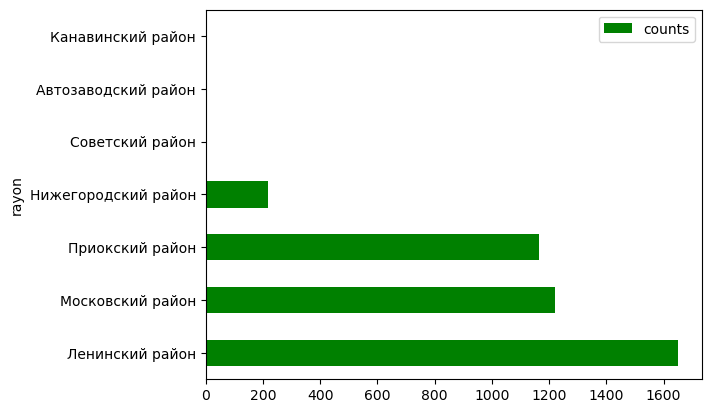

In [32]:
rayon_learn = ready_data.groupby('rayon')['geometry_points'].count().reset_index(name='counts')
rayon_learn = rayon_learn.set_index('rayon').sort_values(by = 'counts', ascending=False)
rayon_learn.plot(kind='barh', color='Green')

Самое большое количество информации о районах мы смогли получить для Ленинского и Московского района города Нижнего Новгорода.

<AxesSubplot:ylabel='light'>

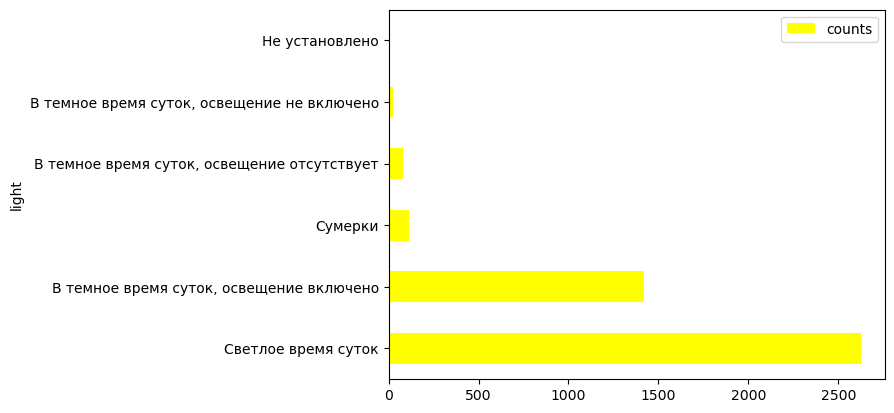

In [33]:
rayon_learn = ready_data.groupby('light')['geometry_points'].count().reset_index(name='counts')
rayon_learn = rayon_learn.set_index('light').sort_values(by = 'counts', ascending=False)
rayon_learn.plot(kind='barh', color='Yellow')

А самое частое время аварий - это свтелое время суток.

Обработаем формат json.

In [34]:
n = df['vehicles']
n

0        [ { "year": 2007, "brand": "RENAULT", "color":...
1        [ { "year": 2007, "brand": "VOLVO", "color": "...
2        [ { "year": 2010, "brand": "HYUNDAI", "color":...
3        [ { "year": 2008, "brand": "TOYOTA", "color": ...
4        [ { "year": 2006, "brand": "ГАЗ", "color": "Се...
                               ...                        
16279    [ { "year": 2009, "brand": "ЛИАЗ", "color": "М...
16280    [ { "year": 2017, "brand": "ПАЗ", "color": "Ор...
16281    [ { "year": 2007, "brand": "ВАЗ", "color": "Се...
16282    [ { "year": 2001, "brand": "ВАЗ", "color": "Ин...
16283    [ { "year": 2013, "brand": "SKODA", "color": "...
Name: vehicles, Length: 16284, dtype: object

In [35]:
for i in range(len(n)):
    dff = json.loads(n[i])
    if not dff:
        n = n.drop(i)

n

0        [ { "year": 2007, "brand": "RENAULT", "color":...
1        [ { "year": 2007, "brand": "VOLVO", "color": "...
2        [ { "year": 2010, "brand": "HYUNDAI", "color":...
3        [ { "year": 2008, "brand": "TOYOTA", "color": ...
4        [ { "year": 2006, "brand": "ГАЗ", "color": "Се...
                               ...                        
16279    [ { "year": 2009, "brand": "ЛИАЗ", "color": "М...
16280    [ { "year": 2017, "brand": "ПАЗ", "color": "Ор...
16281    [ { "year": 2007, "brand": "ВАЗ", "color": "Се...
16282    [ { "year": 2001, "brand": "ВАЗ", "color": "Ин...
16283    [ { "year": 2013, "brand": "SKODA", "color": "...
Name: vehicles, Length: 15918, dtype: object

In [36]:
n = n.reset_index()
n

,index,vehicles
0,0,"[ { ""year"": 2007, ""brand"": ""RENAULT"", ""color"":..."
1,1,"[ { ""year"": 2007, ""brand"": ""VOLVO"", ""color"": ""..."
2,2,"[ { ""year"": 2010, ""brand"": ""HYUNDAI"", ""color"":..."
3,3,"[ { ""year"": 2008, ""brand"": ""TOYOTA"", ""color"": ..."
4,4,"[ { ""year"": 2006, ""brand"": ""ГАЗ"", ""color"": ""Се..."
...,...,...
15913,16279,"[ { ""year"": 2009, ""brand"": ""ЛИАЗ"", ""color"": ""М..."
15914,16280,"[ { ""year"": 2017, ""brand"": ""ПАЗ"", ""color"": ""Ор..."
15915,16281,"[ { ""year"": 2007, ""brand"": ""ВАЗ"", ""color"": ""Се..."
15916,16282,"[ { ""year"": 2001, ""brand"": ""ВАЗ"", ""color"": ""Ин..."


In [37]:
n = n.drop('index', axis=1)
n

,vehicles
0,"[ { ""year"": 2007, ""brand"": ""RENAULT"", ""color"":..."
1,"[ { ""year"": 2007, ""brand"": ""VOLVO"", ""color"": ""..."
2,"[ { ""year"": 2010, ""brand"": ""HYUNDAI"", ""color"":..."
3,"[ { ""year"": 2008, ""brand"": ""TOYOTA"", ""color"": ..."
4,"[ { ""year"": 2006, ""brand"": ""ГАЗ"", ""color"": ""Се..."
...,...
15913,"[ { ""year"": 2009, ""brand"": ""ЛИАЗ"", ""color"": ""М..."
15914,"[ { ""year"": 2017, ""brand"": ""ПАЗ"", ""color"": ""Ор..."
15915,"[ { ""year"": 2007, ""brand"": ""ВАЗ"", ""color"": ""Се..."
15916,"[ { ""year"": 2001, ""brand"": ""ВАЗ"", ""color"": ""Ин..."


In [38]:
n = n['vehicles']
n

0        [ { "year": 2007, "brand": "RENAULT", "color":...
1        [ { "year": 2007, "brand": "VOLVO", "color": "...
2        [ { "year": 2010, "brand": "HYUNDAI", "color":...
3        [ { "year": 2008, "brand": "TOYOTA", "color": ...
4        [ { "year": 2006, "brand": "ГАЗ", "color": "Се...
                               ...                        
15913    [ { "year": 2009, "brand": "ЛИАЗ", "color": "М...
15914    [ { "year": 2017, "brand": "ПАЗ", "color": "Ор...
15915    [ { "year": 2007, "brand": "ВАЗ", "color": "Се...
15916    [ { "year": 2001, "brand": "ВАЗ", "color": "Ин...
15917    [ { "year": 2013, "brand": "SKODA", "color": "...
Name: vehicles, Length: 15918, dtype: object

In [39]:
d = pd.DataFrame()
for i in range(len(n)):
    dff = json.loads(n[i])
    d = pd.concat([d,json_normalize(dff[0])],axis = 0)

In [40]:
d

,year,brand,color,model,category,participants
0,2007,RENAULT,Черный,Symbol,"В-класс (малый) до 3,9 м","[{'role': 'Водитель', 'gender': 'Мужской', 'vi..."
0,2007,VOLVO,Синий,XC90,"В-класс (малый) до 3,9 м","[{'role': 'Водитель', 'gender': 'Мужской', 'vi..."
0,2010,HYUNDAI,Черный,Sonata,"С-класс (малый средний, компактный) до 4,3 м","[{'role': 'Водитель', 'gender': 'Мужской', 'vi..."
0,2008,TOYOTA,Иные цвета,RAV 4,"В-класс (малый) до 3,9 м","[{'role': 'Водитель', 'gender': 'Мужской', 'vi..."
0,2006,ГАЗ,Серый,2752 Соболь и модификации,Фургоны,"[{'role': 'Водитель', 'gender': 'Мужской', 'vi..."
...,...,...,...,...,...,...
0,2009,ЛИАЗ,Многоцветный,5256 (пригородный),Одноэтажные длиной от 8 до 12 м,"[{'role': 'Водитель', 'gender': 'Мужской', 'vi..."
0,2017,ПАЗ,Оранжевый,3204,Одноэтажные длиной от 5 до 8 м,"[{'role': 'Водитель', 'gender': 'Мужской', 'vi..."
0,2007,ВАЗ,Серый,ВАЗ 2112 и модификации,"В-класс (малый) до 3,9 м","[{'role': 'Водитель', 'gender': 'Мужской', 'vi..."
0,2001,ВАЗ,Иные цвета,"Жигули ВАЗ-2108, 09 и модификации ...","В-класс (малый) до 3,9 м","[{'role': 'Водитель', 'gender': 'Женский', 'vi..."


In [41]:
d.index = pd.RangeIndex(start=0, stop=d.shape[0] , step=1)
d

,year,brand,color,model,category,participants
0,2007,RENAULT,Черный,Symbol,"В-класс (малый) до 3,9 м","[{'role': 'Водитель', 'gender': 'Мужской', 'vi..."
1,2007,VOLVO,Синий,XC90,"В-класс (малый) до 3,9 м","[{'role': 'Водитель', 'gender': 'Мужской', 'vi..."
2,2010,HYUNDAI,Черный,Sonata,"С-класс (малый средний, компактный) до 4,3 м","[{'role': 'Водитель', 'gender': 'Мужской', 'vi..."
3,2008,TOYOTA,Иные цвета,RAV 4,"В-класс (малый) до 3,9 м","[{'role': 'Водитель', 'gender': 'Мужской', 'vi..."
4,2006,ГАЗ,Серый,2752 Соболь и модификации,Фургоны,"[{'role': 'Водитель', 'gender': 'Мужской', 'vi..."
...,...,...,...,...,...,...
15913,2009,ЛИАЗ,Многоцветный,5256 (пригородный),Одноэтажные длиной от 8 до 12 м,"[{'role': 'Водитель', 'gender': 'Мужской', 'vi..."
15914,2017,ПАЗ,Оранжевый,3204,Одноэтажные длиной от 5 до 8 м,"[{'role': 'Водитель', 'gender': 'Мужской', 'vi..."
15915,2007,ВАЗ,Серый,ВАЗ 2112 и модификации,"В-класс (малый) до 3,9 м","[{'role': 'Водитель', 'gender': 'Мужской', 'vi..."
15916,2001,ВАЗ,Иные цвета,"Жигули ВАЗ-2108, 09 и модификации ...","В-класс (малый) до 3,9 м","[{'role': 'Водитель', 'gender': 'Женский', 'vi..."


In [42]:
ready_data_1 = df.copy()
ready_data_1

,id,tags,light,point,nearby,region,scheme,address,weather,category,...,participants,injured_count,parent_region,road_conditions,participants_count,participant_categories,geometry,long,lat,lat_long
0,2767224,Дорожно-транспортные происшествия,Светлое время суток,"{'lat': 56.267255, 'long': 43.914639}","[ ""Мост, эстакада, путепровод"", ""Административ...",Нижний новгород,110,"г Нижний Новгород, пр-кт Ленина, 70",Ясно,Столкновение,...,[ ],2,Нижегородская область,Сухое,4,Все участники,POINT (43.91464 56.26725),43.914639,56.267255,"56.267255,43.914639"
1,2767288,Дорожно-транспортные происшествия,"В темное время суток, освещение включено","{'lat': 56.232635, 'long': 43.854986}","[ ""Многоквартирные жилые дома"", ""Регулируемый ...",Нижний новгород,780,"г Нижний Новгород, ул Лескова, 48",Пасмурно,Наезд на пешехода,...,"[ { ""role"": ""Пешеход"", ""gender"": ""Женский"", ""v...",1,Нижегородская область,Мокрое,2,Пешеходы,POINT (43.85499 56.23264),43.854986,56.232635,"56.232635,43.854986"
2,2767298,Дорожно-транспортные происшествия,Светлое время суток,"{'lat': 56.229636, 'long': 43.963766}","[ ""Жилые дома индивидуальной застройки"" ]",Нижний новгород,830,"г Нижний Новгород, ул Маршала Голованова, 9",Ясно,Наезд на пешехода,...,"[ { ""role"": ""Пешеход"", ""gender"": ""Женский"", ""v...",1,Нижегородская область,Сухое,2,Пешеходы,POINT (43.96377 56.22964),43.963766,56.229636,"56.229636,43.963766"
3,2767296,Дорожно-транспортные происшествия,Светлое время суток,"{'lat': 56.339082, 'long': 43.84488}","[ ""Регулируемый перекресток"", ""Регулируемый пе...",Нижний новгород,NaN,"г Нижний Новгород, ул Циолковского, 29",Ясно,Наезд на пешехода,...,"[ { ""role"": ""Пешеход"", ""gender"": ""Мужской"", ""v...",1,Нижегородская область,Иные недостатки,2,Пешеходы,POINT (43.84488 56.33908),43.844880,56.339082,"56.339082,43.84488"
4,2767299,Дорожно-транспортные происшествия,Светлое время суток,"{'lat': 56.287917, 'long': 43.981383}","[ ""АЗС"", ""Регулируемый перекресток"" ]",Нижний новгород,820,"г Нижний Новгород, пр-кт Гагарина, 58",Ясно,Наезд на пешехода,...,"[ { ""role"": ""Пешеход"", ""gender"": ""Мужской"", ""v...",1,Нижегородская область,Сухое,2,Пешеходы,POINT (43.98138 56.28792),43.981383,56.287917,"56.287917,43.981383"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16279,2013263,Дорожно-транспортные происшествия,Светлое время суток,"{'lat': 56.339795, 'long': 43.922932}","[ ""Остановка общественного транспорта"", ""Регул...",Нижний новгород,NaN,"г Нижний Новгород, ул Сергея Акимова, 23",Ясно,Падение пассажира,...,[ ],2,Нижегородская область,Сухое,3,Все участники,POINT (43.92293 56.33980),43.922932,56.339795,"56.339795,43.922932"
16280,2013710,Дорожно-транспортные происшествия,Светлое время суток,"{'lat': 56.244304, 'long': 43.869857}","[ ""Регулируемый перекресток"", ""Регулируемый пе...",Нижний новгород,420,"г Нижний Новгород, пр-кт Ленина, 98",Пасмурно,Столкновение,...,[ ],1,Нижегородская область,Сухое,3,Все участники,POINT (43.86986 56.24430),43.869857,56.244304,"56.244304,43.869857"
16281,2013751,Дорожно-транспортные происшествия,Светлое время суток,"{'lat': 56.356834, 'long': 43.883257}","[ ""Производственное предприятие"" ]",Нижний новгород,040,"г Нижний Новгород, ул Щербакова, 39 б",Ясно,Столкновение,...,[ ],2,Нижегородская область,Сухое,3,Все участники,POINT (43.88326 56.35683),43.883257,56.356834,"56.356834,43.883257"
16282,2013923,Дорожно-транспортные происшествия,Светлое время суток,"{'lat': 56.258333, 'long': 43.258333}",[ ],Нижний новгород,030,"г Нижний Новгород, ш Московское, 345",Пасмурно,Столкновение,...,[ ],1,Нижегородская область,Недостатки зимнего содержания,2,Все участники,POINT (43.25833 56.25833),43.258333,56.258333,"56.258333,43.258333"


In [43]:
for i in range(len(ready_data_1)):
    dff = json.loads(ready_data_1['vehicles'][i])
    if not dff:
        ready_data_1 = ready_data_1.drop(i)

ready_data_1

,id,tags,light,point,nearby,region,scheme,address,weather,category,...,participants,injured_count,parent_region,road_conditions,participants_count,participant_categories,geometry,long,lat,lat_long
0,2767224,Дорожно-транспортные происшествия,Светлое время суток,"{'lat': 56.267255, 'long': 43.914639}","[ ""Мост, эстакада, путепровод"", ""Административ...",Нижний новгород,110,"г Нижний Новгород, пр-кт Ленина, 70",Ясно,Столкновение,...,[ ],2,Нижегородская область,Сухое,4,Все участники,POINT (43.91464 56.26725),43.914639,56.267255,"56.267255,43.914639"
1,2767288,Дорожно-транспортные происшествия,"В темное время суток, освещение включено","{'lat': 56.232635, 'long': 43.854986}","[ ""Многоквартирные жилые дома"", ""Регулируемый ...",Нижний новгород,780,"г Нижний Новгород, ул Лескова, 48",Пасмурно,Наезд на пешехода,...,"[ { ""role"": ""Пешеход"", ""gender"": ""Женский"", ""v...",1,Нижегородская область,Мокрое,2,Пешеходы,POINT (43.85499 56.23264),43.854986,56.232635,"56.232635,43.854986"
2,2767298,Дорожно-транспортные происшествия,Светлое время суток,"{'lat': 56.229636, 'long': 43.963766}","[ ""Жилые дома индивидуальной застройки"" ]",Нижний новгород,830,"г Нижний Новгород, ул Маршала Голованова, 9",Ясно,Наезд на пешехода,...,"[ { ""role"": ""Пешеход"", ""gender"": ""Женский"", ""v...",1,Нижегородская область,Сухое,2,Пешеходы,POINT (43.96377 56.22964),43.963766,56.229636,"56.229636,43.963766"
3,2767296,Дорожно-транспортные происшествия,Светлое время суток,"{'lat': 56.339082, 'long': 43.84488}","[ ""Регулируемый перекресток"", ""Регулируемый пе...",Нижний новгород,NaN,"г Нижний Новгород, ул Циолковского, 29",Ясно,Наезд на пешехода,...,"[ { ""role"": ""Пешеход"", ""gender"": ""Мужской"", ""v...",1,Нижегородская область,Иные недостатки,2,Пешеходы,POINT (43.84488 56.33908),43.844880,56.339082,"56.339082,43.84488"
4,2767299,Дорожно-транспортные происшествия,Светлое время суток,"{'lat': 56.287917, 'long': 43.981383}","[ ""АЗС"", ""Регулируемый перекресток"" ]",Нижний новгород,820,"г Нижний Новгород, пр-кт Гагарина, 58",Ясно,Наезд на пешехода,...,"[ { ""role"": ""Пешеход"", ""gender"": ""Мужской"", ""v...",1,Нижегородская область,Сухое,2,Пешеходы,POINT (43.98138 56.28792),43.981383,56.287917,"56.287917,43.981383"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16279,2013263,Дорожно-транспортные происшествия,Светлое время суток,"{'lat': 56.339795, 'long': 43.922932}","[ ""Остановка общественного транспорта"", ""Регул...",Нижний новгород,NaN,"г Нижний Новгород, ул Сергея Акимова, 23",Ясно,Падение пассажира,...,[ ],2,Нижегородская область,Сухое,3,Все участники,POINT (43.92293 56.33980),43.922932,56.339795,"56.339795,43.922932"
16280,2013710,Дорожно-транспортные происшествия,Светлое время суток,"{'lat': 56.244304, 'long': 43.869857}","[ ""Регулируемый перекресток"", ""Регулируемый пе...",Нижний новгород,420,"г Нижний Новгород, пр-кт Ленина, 98",Пасмурно,Столкновение,...,[ ],1,Нижегородская область,Сухое,3,Все участники,POINT (43.86986 56.24430),43.869857,56.244304,"56.244304,43.869857"
16281,2013751,Дорожно-транспортные происшествия,Светлое время суток,"{'lat': 56.356834, 'long': 43.883257}","[ ""Производственное предприятие"" ]",Нижний новгород,040,"г Нижний Новгород, ул Щербакова, 39 б",Ясно,Столкновение,...,[ ],2,Нижегородская область,Сухое,3,Все участники,POINT (43.88326 56.35683),43.883257,56.356834,"56.356834,43.883257"
16282,2013923,Дорожно-транспортные происшествия,Светлое время суток,"{'lat': 56.258333, 'long': 43.258333}",[ ],Нижний новгород,030,"г Нижний Новгород, ш Московское, 345",Пасмурно,Столкновение,...,[ ],1,Нижегородская область,Недостатки зимнего содержания,2,Все участники,POINT (43.25833 56.25833),43.258333,56.258333,"56.258333,43.258333"


In [44]:
ready_data_1.index = pd.RangeIndex(start=0, stop=ready_data_1.shape[0] , step=1)
ready_data_1 = ready_data_1.drop( "participants", axis=1)
ready_data_1

,id,tags,light,point,nearby,region,scheme,address,weather,category,...,dead_count,injured_count,parent_region,road_conditions,participants_count,participant_categories,geometry,long,lat,lat_long
0,2767224,Дорожно-транспортные происшествия,Светлое время суток,"{'lat': 56.267255, 'long': 43.914639}","[ ""Мост, эстакада, путепровод"", ""Административ...",Нижний новгород,110,"г Нижний Новгород, пр-кт Ленина, 70",Ясно,Столкновение,...,0,2,Нижегородская область,Сухое,4,Все участники,POINT (43.91464 56.26725),43.914639,56.267255,"56.267255,43.914639"
1,2767288,Дорожно-транспортные происшествия,"В темное время суток, освещение включено","{'lat': 56.232635, 'long': 43.854986}","[ ""Многоквартирные жилые дома"", ""Регулируемый ...",Нижний новгород,780,"г Нижний Новгород, ул Лескова, 48",Пасмурно,Наезд на пешехода,...,0,1,Нижегородская область,Мокрое,2,Пешеходы,POINT (43.85499 56.23264),43.854986,56.232635,"56.232635,43.854986"
2,2767298,Дорожно-транспортные происшествия,Светлое время суток,"{'lat': 56.229636, 'long': 43.963766}","[ ""Жилые дома индивидуальной застройки"" ]",Нижний новгород,830,"г Нижний Новгород, ул Маршала Голованова, 9",Ясно,Наезд на пешехода,...,0,1,Нижегородская область,Сухое,2,Пешеходы,POINT (43.96377 56.22964),43.963766,56.229636,"56.229636,43.963766"
3,2767296,Дорожно-транспортные происшествия,Светлое время суток,"{'lat': 56.339082, 'long': 43.84488}","[ ""Регулируемый перекресток"", ""Регулируемый пе...",Нижний новгород,NaN,"г Нижний Новгород, ул Циолковского, 29",Ясно,Наезд на пешехода,...,0,1,Нижегородская область,Иные недостатки,2,Пешеходы,POINT (43.84488 56.33908),43.844880,56.339082,"56.339082,43.84488"
4,2767299,Дорожно-транспортные происшествия,Светлое время суток,"{'lat': 56.287917, 'long': 43.981383}","[ ""АЗС"", ""Регулируемый перекресток"" ]",Нижний новгород,820,"г Нижний Новгород, пр-кт Гагарина, 58",Ясно,Наезд на пешехода,...,0,1,Нижегородская область,Сухое,2,Пешеходы,POINT (43.98138 56.28792),43.981383,56.287917,"56.287917,43.981383"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15913,2013263,Дорожно-транспортные происшествия,Светлое время суток,"{'lat': 56.339795, 'long': 43.922932}","[ ""Остановка общественного транспорта"", ""Регул...",Нижний новгород,NaN,"г Нижний Новгород, ул Сергея Акимова, 23",Ясно,Падение пассажира,...,0,2,Нижегородская область,Сухое,3,Все участники,POINT (43.92293 56.33980),43.922932,56.339795,"56.339795,43.922932"
15914,2013710,Дорожно-транспортные происшествия,Светлое время суток,"{'lat': 56.244304, 'long': 43.869857}","[ ""Регулируемый перекресток"", ""Регулируемый пе...",Нижний новгород,420,"г Нижний Новгород, пр-кт Ленина, 98",Пасмурно,Столкновение,...,0,1,Нижегородская область,Сухое,3,Все участники,POINT (43.86986 56.24430),43.869857,56.244304,"56.244304,43.869857"
15915,2013751,Дорожно-транспортные происшествия,Светлое время суток,"{'lat': 56.356834, 'long': 43.883257}","[ ""Производственное предприятие"" ]",Нижний новгород,040,"г Нижний Новгород, ул Щербакова, 39 б",Ясно,Столкновение,...,0,2,Нижегородская область,Сухое,3,Все участники,POINT (43.88326 56.35683),43.883257,56.356834,"56.356834,43.883257"
15916,2013923,Дорожно-транспортные происшествия,Светлое время суток,"{'lat': 56.258333, 'long': 43.258333}",[ ],Нижний новгород,030,"г Нижний Новгород, ш Московское, 345",Пасмурно,Столкновение,...,0,1,Нижегородская область,Недостатки зимнего содержания,2,Все участники,POINT (43.25833 56.25833),43.258333,56.258333,"56.258333,43.258333"


In [45]:
d_2 = d.copy()
d_2 = d_2.rename(columns = {'category':'machine_category'})

d_2

,year,brand,color,model,machine_category,participants
0,2007,RENAULT,Черный,Symbol,"В-класс (малый) до 3,9 м","[{'role': 'Водитель', 'gender': 'Мужской', 'vi..."
1,2007,VOLVO,Синий,XC90,"В-класс (малый) до 3,9 м","[{'role': 'Водитель', 'gender': 'Мужской', 'vi..."
2,2010,HYUNDAI,Черный,Sonata,"С-класс (малый средний, компактный) до 4,3 м","[{'role': 'Водитель', 'gender': 'Мужской', 'vi..."
3,2008,TOYOTA,Иные цвета,RAV 4,"В-класс (малый) до 3,9 м","[{'role': 'Водитель', 'gender': 'Мужской', 'vi..."
4,2006,ГАЗ,Серый,2752 Соболь и модификации,Фургоны,"[{'role': 'Водитель', 'gender': 'Мужской', 'vi..."
...,...,...,...,...,...,...
15913,2009,ЛИАЗ,Многоцветный,5256 (пригородный),Одноэтажные длиной от 8 до 12 м,"[{'role': 'Водитель', 'gender': 'Мужской', 'vi..."
15914,2017,ПАЗ,Оранжевый,3204,Одноэтажные длиной от 5 до 8 м,"[{'role': 'Водитель', 'gender': 'Мужской', 'vi..."
15915,2007,ВАЗ,Серый,ВАЗ 2112 и модификации,"В-класс (малый) до 3,9 м","[{'role': 'Водитель', 'gender': 'Мужской', 'vi..."
15916,2001,ВАЗ,Иные цвета,"Жигули ВАЗ-2108, 09 и модификации ...","В-класс (малый) до 3,9 м","[{'role': 'Водитель', 'gender': 'Женский', 'vi..."


Объеденим обработанные данные с общими данными.

In [46]:
result = pd.concat([ready_data_1, d_2], axis=1)
result

,id,tags,light,point,nearby,region,scheme,address,weather,category,...,geometry,long,lat,lat_long,year,brand,color,model,machine_category,participants
0,2767224,Дорожно-транспортные происшествия,Светлое время суток,"{'lat': 56.267255, 'long': 43.914639}","[ ""Мост, эстакада, путепровод"", ""Административ...",Нижний новгород,110,"г Нижний Новгород, пр-кт Ленина, 70",Ясно,Столкновение,...,POINT (43.91464 56.26725),43.914639,56.267255,"56.267255,43.914639",2007,RENAULT,Черный,Symbol,"В-класс (малый) до 3,9 м","[{'role': 'Водитель', 'gender': 'Мужской', 'vi..."
1,2767288,Дорожно-транспортные происшествия,"В темное время суток, освещение включено","{'lat': 56.232635, 'long': 43.854986}","[ ""Многоквартирные жилые дома"", ""Регулируемый ...",Нижний новгород,780,"г Нижний Новгород, ул Лескова, 48",Пасмурно,Наезд на пешехода,...,POINT (43.85499 56.23264),43.854986,56.232635,"56.232635,43.854986",2007,VOLVO,Синий,XC90,"В-класс (малый) до 3,9 м","[{'role': 'Водитель', 'gender': 'Мужской', 'vi..."
2,2767298,Дорожно-транспортные происшествия,Светлое время суток,"{'lat': 56.229636, 'long': 43.963766}","[ ""Жилые дома индивидуальной застройки"" ]",Нижний новгород,830,"г Нижний Новгород, ул Маршала Голованова, 9",Ясно,Наезд на пешехода,...,POINT (43.96377 56.22964),43.963766,56.229636,"56.229636,43.963766",2010,HYUNDAI,Черный,Sonata,"С-класс (малый средний, компактный) до 4,3 м","[{'role': 'Водитель', 'gender': 'Мужской', 'vi..."
3,2767296,Дорожно-транспортные происшествия,Светлое время суток,"{'lat': 56.339082, 'long': 43.84488}","[ ""Регулируемый перекресток"", ""Регулируемый пе...",Нижний новгород,NaN,"г Нижний Новгород, ул Циолковского, 29",Ясно,Наезд на пешехода,...,POINT (43.84488 56.33908),43.844880,56.339082,"56.339082,43.84488",2008,TOYOTA,Иные цвета,RAV 4,"В-класс (малый) до 3,9 м","[{'role': 'Водитель', 'gender': 'Мужской', 'vi..."
4,2767299,Дорожно-транспортные происшествия,Светлое время суток,"{'lat': 56.287917, 'long': 43.981383}","[ ""АЗС"", ""Регулируемый перекресток"" ]",Нижний новгород,820,"г Нижний Новгород, пр-кт Гагарина, 58",Ясно,Наезд на пешехода,...,POINT (43.98138 56.28792),43.981383,56.287917,"56.287917,43.981383",2006,ГАЗ,Серый,2752 Соболь и модификации,Фургоны,"[{'role': 'Водитель', 'gender': 'Мужской', 'vi..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15913,2013263,Дорожно-транспортные происшествия,Светлое время суток,"{'lat': 56.339795, 'long': 43.922932}","[ ""Остановка общественного транспорта"", ""Регул...",Нижний новгород,NaN,"г Нижний Новгород, ул Сергея Акимова, 23",Ясно,Падение пассажира,...,POINT (43.92293 56.33980),43.922932,56.339795,"56.339795,43.922932",2009,ЛИАЗ,Многоцветный,5256 (пригородный),Одноэтажные длиной от 8 до 12 м,"[{'role': 'Водитель', 'gender': 'Мужской', 'vi..."
15914,2013710,Дорожно-транспортные происшествия,Светлое время суток,"{'lat': 56.244304, 'long': 43.869857}","[ ""Регулируемый перекресток"", ""Регулируемый пе...",Нижний новгород,420,"г Нижний Новгород, пр-кт Ленина, 98",Пасмурно,Столкновение,...,POINT (43.86986 56.24430),43.869857,56.244304,"56.244304,43.869857",2017,ПАЗ,Оранжевый,3204,Одноэтажные длиной от 5 до 8 м,"[{'role': 'Водитель', 'gender': 'Мужской', 'vi..."
15915,2013751,Дорожно-транспортные происшествия,Светлое время суток,"{'lat': 56.356834, 'long': 43.883257}","[ ""Производственное предприятие"" ]",Нижний новгород,040,"г Нижний Новгород, ул Щербакова, 39 б",Ясно,Столкновение,...,POINT (43.88326 56.35683),43.883257,56.356834,"56.356834,43.883257",2007,ВАЗ,Серый,ВАЗ 2112 и модификации,"В-класс (малый) до 3,9 м","[{'role': 'Водитель', 'gender': 'Мужской', 'vi..."
15916,2013923,Дорожно-транспортные происшествия,Светлое время суток,"{'lat': 56.258333, 'long': 43.258333}",[ ],Нижний новгород,030,"г Нижний Новгород, ш Московское, 345",Пасмурно,Столкновение,...,POINT (43.25833 56.25833),43.258333,56.258333,"56.258333,43.258333",2001,ВАЗ,Иные цвета,"Жигули ВАЗ-2108, 09 и модификации ...","В-класс (малый) до 3,9 м","[{'role': 'В

Обработаем другим способом json формат, для других данных.

In [47]:
n = result[['participants']]

In [48]:
n

,participants
0,"[{'role': 'Водитель', 'gender': 'Мужской', 'vi..."
1,"[{'role': 'Водитель', 'gender': 'Мужской', 'vi..."
2,"[{'role': 'Водитель', 'gender': 'Мужской', 'vi..."
3,"[{'role': 'Водитель', 'gender': 'Мужской', 'vi..."
4,"[{'role': 'Водитель', 'gender': 'Мужской', 'vi..."
...,...
15913,"[{'role': 'Водитель', 'gender': 'Мужской', 'vi..."
15914,"[{'role': 'Водитель', 'gender': 'Мужской', 'vi..."
15915,"[{'role': 'Водитель', 'gender': 'Мужской', 'vi..."
15916,"[{'role': 'Водитель', 'gender': 'Женский', 'vi..."


In [49]:
d_3 = pd.DataFrame()
for i in range(len(n)):
    o = n.iloc[i]
    l = json_normalize(o[0])
    d_3 = pd.concat([d_3, l], ignore_index = True)

In [50]:
o = n.iloc[15917]

json_normalize(o[0])

,role,gender,violations,health_status,years_of_driving_experience
0,Водитель,Женский,[Нарушение требований сигналов светофора],"Раненый, находящийся (находившийся) на амбула...",2


In [51]:
result

,id,tags,light,point,nearby,region,scheme,address,weather,category,...,geometry,long,lat,lat_long,year,brand,color,model,machine_category,participants
0,2767224,Дорожно-транспортные происшествия,Светлое время суток,"{'lat': 56.267255, 'long': 43.914639}","[ ""Мост, эстакада, путепровод"", ""Административ...",Нижний новгород,110,"г Нижний Новгород, пр-кт Ленина, 70",Ясно,Столкновение,...,POINT (43.91464 56.26725),43.914639,56.267255,"56.267255,43.914639",2007,RENAULT,Черный,Symbol,"В-класс (малый) до 3,9 м","[{'role': 'Водитель', 'gender': 'Мужской', 'vi..."
1,2767288,Дорожно-транспортные происшествия,"В темное время суток, освещение включено","{'lat': 56.232635, 'long': 43.854986}","[ ""Многоквартирные жилые дома"", ""Регулируемый ...",Нижний новгород,780,"г Нижний Новгород, ул Лескова, 48",Пасмурно,Наезд на пешехода,...,POINT (43.85499 56.23264),43.854986,56.232635,"56.232635,43.854986",2007,VOLVO,Синий,XC90,"В-класс (малый) до 3,9 м","[{'role': 'Водитель', 'gender': 'Мужской', 'vi..."
2,2767298,Дорожно-транспортные происшествия,Светлое время суток,"{'lat': 56.229636, 'long': 43.963766}","[ ""Жилые дома индивидуальной застройки"" ]",Нижний новгород,830,"г Нижний Новгород, ул Маршала Голованова, 9",Ясно,Наезд на пешехода,...,POINT (43.96377 56.22964),43.963766,56.229636,"56.229636,43.963766",2010,HYUNDAI,Черный,Sonata,"С-класс (малый средний, компактный) до 4,3 м","[{'role': 'Водитель', 'gender': 'Мужской', 'vi..."
3,2767296,Дорожно-транспортные происшествия,Светлое время суток,"{'lat': 56.339082, 'long': 43.84488}","[ ""Регулируемый перекресток"", ""Регулируемый пе...",Нижний новгород,NaN,"г Нижний Новгород, ул Циолковского, 29",Ясно,Наезд на пешехода,...,POINT (43.84488 56.33908),43.844880,56.339082,"56.339082,43.84488",2008,TOYOTA,Иные цвета,RAV 4,"В-класс (малый) до 3,9 м","[{'role': 'Водитель', 'gender': 'Мужской', 'vi..."
4,2767299,Дорожно-транспортные происшествия,Светлое время суток,"{'lat': 56.287917, 'long': 43.981383}","[ ""АЗС"", ""Регулируемый перекресток"" ]",Нижний новгород,820,"г Нижний Новгород, пр-кт Гагарина, 58",Ясно,Наезд на пешехода,...,POINT (43.98138 56.28792),43.981383,56.287917,"56.287917,43.981383",2006,ГАЗ,Серый,2752 Соболь и модификации,Фургоны,"[{'role': 'Водитель', 'gender': 'Мужской', 'vi..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15913,2013263,Дорожно-транспортные происшествия,Светлое время суток,"{'lat': 56.339795, 'long': 43.922932}","[ ""Остановка общественного транспорта"", ""Регул...",Нижний новгород,NaN,"г Нижний Новгород, ул Сергея Акимова, 23",Ясно,Падение пассажира,...,POINT (43.92293 56.33980),43.922932,56.339795,"56.339795,43.922932",2009,ЛИАЗ,Многоцветный,5256 (пригородный),Одноэтажные длиной от 8 до 12 м,"[{'role': 'Водитель', 'gender': 'Мужской', 'vi..."
15914,2013710,Дорожно-транспортные происшествия,Светлое время суток,"{'lat': 56.244304, 'long': 43.869857}","[ ""Регулируемый перекресток"", ""Регулируемый пе...",Нижний новгород,420,"г Нижний Новгород, пр-кт Ленина, 98",Пасмурно,Столкновение,...,POINT (43.86986 56.24430),43.869857,56.244304,"56.244304,43.869857",2017,ПАЗ,Оранжевый,3204,Одноэтажные длиной от 5 до 8 м,"[{'role': 'Водитель', 'gender': 'Мужской', 'vi..."
15915,2013751,Дорожно-транспортные происшествия,Светлое время суток,"{'lat': 56.356834, 'long': 43.883257}","[ ""Производственное предприятие"" ]",Нижний новгород,040,"г Нижний Новгород, ул Щербакова, 39 б",Ясно,Столкновение,...,POINT (43.88326 56.35683),43.883257,56.356834,"56.356834,43.883257",2007,ВАЗ,Серый,ВАЗ 2112 и модификации,"В-класс (малый) до 3,9 м","[{'role': 'Водитель', 'gender': 'Мужской', 'vi..."
15916,2013923,Дорожно-транспортные происшествия,Светлое время суток,"{'lat': 56.258333, 'long': 43.258333}",[ ],Нижний новгород,030,"г Нижний Новгород, ш Московское, 345",Пасмурно,Столкновение,...,POINT (43.25833 56.25833),43.258333,56.258333,"56.258333,43.258333",2001,ВАЗ,Иные цвета,"Жигули ВАЗ-2108, 09 и модификации ...","В-класс (малый) до 3,9 м","[{'role': 'В

In [52]:
d_3

,role,gender,violations,health_status,years_of_driving_experience
0,Водитель,Мужской,"[Нарушение правил перестроения, Несоблюдение т...",Не пострадал,None
1,Водитель,Мужской,[Невыполнение требований обеспечения безопасно...,Не пострадал,None
2,Водитель,Мужской,[],Не пострадал,None
3,Водитель,Мужской,[],Не пострадал,None
4,Водитель,Мужской,[],Не пострадал,None
...,...,...,...,...,...
20294,Пассажир,Мужской,[],"Раненый, находящийся (находившийся) на амбула...",NaN
20295,Водитель,Мужской,[Нарушение требований сигналов светофора],Не пострадал,7
20296,Водитель,Мужской,[Нарушение правил перестроения],Не пострадал,6
20297,Водитель,Женский,[Несоответствие скорости конкретным условиям д...,"Раненый, находящийся (находившийся) на амбула...",4


У нас вышло больше строк чем в оригинале, потому что роли в основном файле состояли из двух позиций в некоторых местах.

Изучим данные , поученные выше. Какие люди чаще попадают в аварии? По каким возможным причинам? Сколько из них остаются живы а сколько умирает?

In [53]:
role_count = d_3.groupby('role')['gender'].count().reset_index().sort_values(by = "gender", ascending=False)
role_count

,role,gender
1,Водитель,14633
2,Пассажир,4144
0,Велосипедист,157
3,Пешеход,8


In [54]:
walker = d_3[d_3['role'] == "Пешеход"]

In [55]:
walker

,role,gender,violations,health_status,years_of_driving_experience
458,Пешеход,Мужской,[Иные нарушения],"Раненый, находящийся (находившийся) на амбулат...",None
3689,Пешеход,Мужской,[Иные нарушения],"Раненый, находящийся (находившийся) на амбулат...",None
3895,Пешеход,Мужской,[],"Раненый, находящийся (находившийся) на амбулат...",None
4150,Пешеход,Мужской,[Переход через проезжую часть вне пешеходного ...,"Раненый, находящийся (находившийся) на стацион...",None
6124,Пешеход,Женский,[],"Раненый, находящийся (находившийся) на амбулат...",None
8184,Пешеход,Мужской,[Передвижение по проезжей части на скейтборде ...,"Раненый, находящийся (находившийся) на амбулат...",None
18909,Пешеход,Женский,[],"Раненый, находящийся (находившийся) на амбулат...",None
18935,Пешеход,Мужской,"[Иные нарушения, Передвижение по проезжей част...","Раненый, находящийся (находившийся) на амбулат...",None


О пешеходах известно то, что все они ранены и все на амбулатоном лечении. Среди них был один скейтбордист и две женщины.

In [56]:
bicyclist = d_3[d_3['role'] == "Велосипедист"]

In [57]:
bicyclist

,role,gender,violations,health_status,years_of_driving_experience
11,Велосипедист,Мужской,[Несоблюдение очередности проезда],"Раненый, находящийся (находившийся) на амбулат...",None
314,Велосипедист,Мужской,[Несоблюдение очередности проезда перекрестков],"Раненый, находящийся (находившийся) на амбула...",None
335,Велосипедист,Мужской,[Нарушение правил проезда пешеходного перехода...,"Раненый, находящийся (находившийся) на амбулат...",None
575,Велосипедист,Мужской,"[Несоблюдение очередности проезда, Управление ...","Раненый, находящийся (находившийся) на амбулат...",None
585,Велосипедист,Мужской,[Несоблюдение очередности проезда],"Раненый, находящийся (находившийся) на амбулат...",None
...,...,...,...,...,...
20035,Велосипедист,Мужской,"[Неподача или неправильная подача сигналов, На...","Раненый, находящийся (находившийся) на стацион...",None
20080,Велосипедист,Мужской,[],"Раненый, находящийся (находившийся) на амбула...",None
20086,Велосипедист,Мужской,[],"Раненый, находящийся (находившийся) на амбула...",None
20090,Велосипедист,Мужской,[Управление ТС в состоянии алкогольного опьяне...,"Раненый, находящийся (находившийся) на амбула...",None


In [58]:
injured_cyclist = bicyclist.groupby('health_status')['role'].count().reset_index()
injured_cyclist

,health_status,role
0,"Раненый, находящийся (находившийся) на амбула...",94
1,"Раненый, находящийся (находившийся) на амбулат...",43
2,"Раненый, находящийся (находившийся) на стацион...",25
3,Скончался в течение 7 суток,1
4,Скончался на месте ДТП до приезда скорой медиц...,1


In [59]:
before_arrival_one = injured_cyclist[injured_cyclist['health_status'].str.contains\
                                               ("Скончался на месте ДТП до приезда скорой")].sum()[1]
one = injured_cyclist[injured_cyclist['health_status'].str.contains("Скончался")].sum()[1]
print("Всего умерло: ", one)

Всего умерло:  2


Среди велосипедистов есть 2 погибших , один скончался до приезда скорой помощи, а второй находился в тяжелом состоянии и поэтому не выжил.

In [60]:
passenger = d_3[d_3['role'] == "Пассажир"]
passenger

,role,gender,violations,health_status,years_of_driving_experience
5,Пассажир,Женский,[],"Раненый, находящийся (находившийся) на амбулат...",None
12,Пассажир,Женский,[],"Раненый, находящийся (находившийся) на амбулат...",None
17,Пассажир,Женский,[],"Раненый, находящийся (находившийся) на амбула...",NaN
22,Пассажир,Мужской,[],"Раненый, находящийся (находившийся) на амбула...",NaN
24,Пассажир,None,[],"Раненый, находящийся (находившийся) на амбула...",NaN
...,...,...,...,...,...
20288,Пассажир,Женский,[],"Раненый, находящийся (находившийся) на амбула...",NaN
20289,Пассажир,Мужской,[],"Раненый, находящийся (находившийся) на амбула...",NaN
20290,Пассажир,Женский,[],"Раненый, находящийся (находившийся) на амбула...",NaN
20293,Пассажир,Мужской,[],"Раненый, находящийся (находившийся) на амбула...",NaN


In [61]:
the_passenger_was_injured = passenger.groupby('health_status')['role'].count().reset_index()
the_passenger_was_injured

,health_status,role
0,Не пострадал,15
1,Получил травмы с оказанием разовой медицинской...,8
2,"Раненый, находящийся (находившийся) на амбула...",2629
3,"Раненый, находящийся (находившийся) на амбулат...",1238
4,"Раненый, находящийся (находившийся) на стацион...",459
5,Скончался в течение 1 суток,3
6,Скончался в течение 10 суток,1
7,Скончался в течение 19 суток,1
8,Скончался в течение 2 суток,1
9,Скончался в течение 20 суток,1


In [62]:
before_arrival_two = the_passenger_was_injured[the_passenger_was_injured['health_status'].str.contains\
                                               ("Скончался на месте ДТП до приезда скорой")].sum()[1]
two = the_passenger_was_injured[the_passenger_was_injured['health_status'].str.contains("Скончался")].sum()[1]
print("Всего умерло: ", two)


Всего умерло:  35


35 человек из пассажиров погибли после ДТП. 18 человек умерли до приезда скорой помощи.

In [63]:
driver = d_3[d_3['role'] == "Водитель"]
driver

,role,gender,violations,health_status,years_of_driving_experience
0,Водитель,Мужской,"[Нарушение правил перестроения, Несоблюдение т...",Не пострадал,None
1,Водитель,Мужской,[Невыполнение требований обеспечения безопасно...,Не пострадал,None
2,Водитель,Мужской,[],Не пострадал,None
3,Водитель,Мужской,[],Не пострадал,None
4,Водитель,Мужской,[],Не пострадал,None
...,...,...,...,...,...
20292,Водитель,Мужской,[Другие нарушения ПДД водителем],Не пострадал,20.0
20295,Водитель,Мужской,[Нарушение требований сигналов светофора],Не пострадал,7
20296,Водитель,Мужской,[Нарушение правил перестроения],Не пострадал,6
20297,Водитель,Женский,[Несоответствие скорости конкретным условиям д...,"Раненый, находящийся (находившийся) на амбула...",4


In [64]:
the_driver_was_injured = driver.groupby('health_status')['role'].count().reset_index()
the_driver_was_injured

,health_status,role
0,Не пострадал,12533
1,Получил травмы с оказанием разовой медицинской...,1
2,"Раненый, находящийся (находившийся) на амбула...",1600
3,"Раненый, находящийся (находившийся) на амбулат...",1051
4,"Раненый, находящийся (находившийся) на стацион...",366
5,Скончался в течение 1 суток,13
6,Скончался в течение 12 суток,1
7,Скончался в течение 22 суток,1
8,Скончался в течение 3 суток,3
9,Скончался в течение 30 суток,1


In [65]:
before_arrival_three = the_driver_was_injured[the_driver_was_injured['health_status'].str.contains\
                                               ("Скончался на месте ДТП до приезда скорой")].sum()[1]
three = the_driver_was_injured[the_driver_was_injured['health_status'].str.contains("Скончался")].sum()[1]
print("Всего умерло: ", three)


Всего умерло:  81


81 водитель погиб, после случившегося ДТП, из них 49 умерли еще до приезда скорой помощи.

In [66]:
everything_died = one + two + three
before_arrival = before_arrival_one + before_arrival_two + before_arrival_three
died_after = everything_died - before_arrival
vals = [died_after,before_arrival]



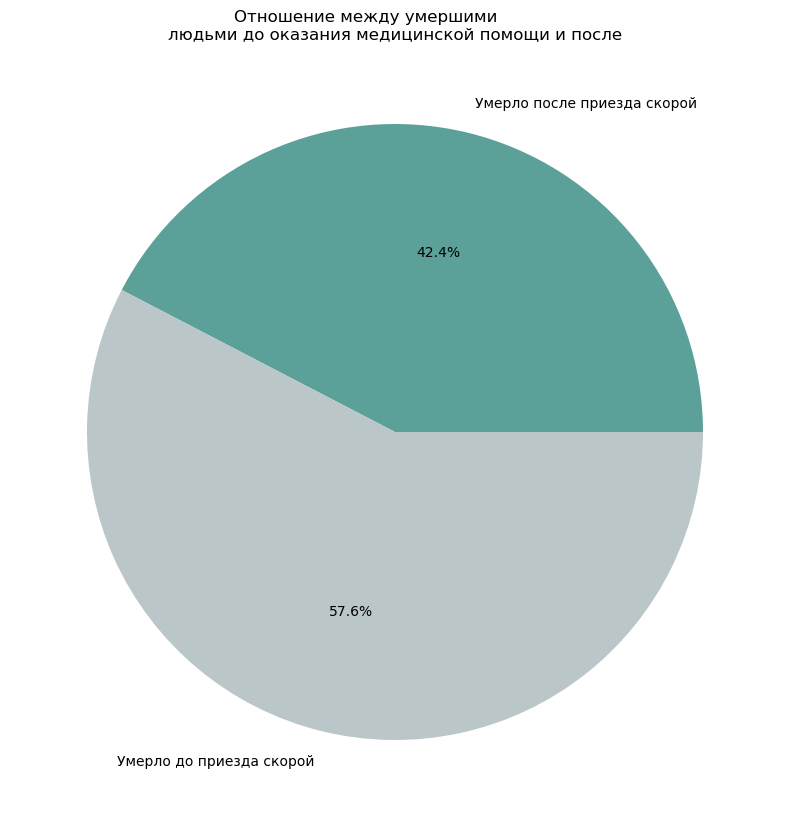

In [67]:
labels = ['Умерло после приезда скорой', 'Умерло до приезда скорой']
fig= plt.figure(figsize=(10,10)) 
colors = ['#5BA199','#BBC6C8']
plt.title('Отношение между умершими \
          \nлюдьми до оказания медицинской помощи и после')
plt.pie(vals,labels=labels,colors=colors,autopct='%1.1f%%')

plt.show()

Остаются живы, как мы могли увидеть, большинство людей, большая часть пострадавших находится на амбулаторном лечении в больнице. Пострадавших среди пешеходов меньше всего, значит светофоры в достаточном количестве и люди не рискуют лишний раз перебегая проезжую часть.Возможной причиной можно считать как раз то , что машины разгоняются достаточно сильно, и именно поэтому они не успевают среагировать на какие-то конкретные ситуации, а пострадавшие не всегда доживают до оказания медицинской помощи.

Изучить дополнительные источники информации: о машинах, брендах и классах.

In [68]:
machine_color = result.groupby('color')['id'].count().reset_index().\
sort_values(by = 'id',ascending = False)
machine_color

,color,id
0,Белый,2951
9,Серый,2414
3,Иные цвета,2370
12,Черный,2219
8,Оранжевый,1266
10,Синий,1205
5,Красный,925
2,Зеленый,437
4,Коричневый,414
6,Многоцветный,254


In [171]:
# fig = px.bar(machine_color, x="color", y="id",color="id",title='Цвет машины',)
# fig.update_layout(height = 800)
# fig.show()

![Image_for_Europe](https://raw.githubusercontent.com/Hope122333/proj/main/bar/new_poligons/48j9q5cdWt8.jpg)

Самыми распространенными цветами машин являются белый и серый. Скорее всего это связано не с самим предпочтением в городе, а тем что , это в принципе самые популярные два цвета при покупке и продаже и изготовлении машин на заводах.

In [70]:
machine_model = result.groupby('model')['id'].count().reset_index().\
sort_values(by = 'id',ascending = False).head(10)
machine_model

,model,id
452,Rio,520
44,3204,516
346,Logan,462
484,Solaris,390
48,32054,334
642,Прочие марки и модели ТС,333
765,Прочие модели ГАЗ,283
292,Granta (Гранта),277
268,Focus,253
75,5256,217


In [169]:
# fig = px.bar(machine_model, x="model", y="id",color="id",title='Модель машины',)
# fig.update_layout(height = 800)
# fig.show()

![Image_for_Europe](https://raw.githubusercontent.com/Hope122333/proj/main/bar/new_poligons/9JOSf4GsoD8.jpg)

Два первых места занимают такие модели как Rio и 3204. Стоит обратить внимание, что 3204 - этовысокопольный автобус малого класса, для перевезки пассажиров.Возможно он также является причиной аварий, крупные машины чаще попадают в аварии , потому что с ними сложнее разойтись на дороге, не говоря о том, что существуют аварии , когда машина влетает в стоящий объект, и при таких авариях часто возникают как раз летальные случаи.

In [72]:
brand_machine = result.groupby('brand')['id'].count().reset_index().\
sort_values(by = 'id',ascending = False).head(10)
brand_machine

,brand,id
128,ВАЗ,2308
145,ПАЗ,1124
66,KIA,1095
53,HYUNDAI,1046
97,RENAULT,838
139,ЛИАЗ,648
131,ГАЗ,593
85,NISSAN,575
20,CHEVROLET,533
122,VOLKSWAGEN,511


In [167]:
# fig = go.Figure(
#     data=
#     [go.Bar(
#         name="Более 2000 аварий",
#         y=brand_machine['id'],
#         x = brand_machine['brand'],
#         marker_color="firebrick")],
#      layout=go.Layout(
#         title="Бренд машины",
#         yaxis_title="Количество аварий"))
     
# fig.update_layout(height = 800)
# fig.show()   

![Image_for_Europe](https://raw.githubusercontent.com/Hope122333/proj/main/bar/new_poligons/LN-xKyzAZUc.jpg)

ПАЗ - это как раз тот самый автобус, который чаще других попадает в аварии, от этого и статитистика.

In [74]:
category_machine = result.groupby('machine_category')['id'].count().reset_index().\
sort_values(by = 'id',ascending = False).head(10)
category_machine

,machine_category,id
12,"В-класс (малый) до 3,9 м",5305
47,"С-класс (малый средний, компактный) до 4,3 м",2995
0,"D-класс (средний) до 4,6 м",1302
33,Одноэтажные длиной от 5 до 8 м,1166
42,Прочие легковые автомобили,1146
34,Одноэтажные длиной от 8 до 12 м,515
24,Минивэны и универсалы повышенной вместимости,396
61,Фургоны,372
2,"А-класс (особо малый) до 3,5 м",364
30,Мотоциклы,256


In [165]:

# fig = go.Figure(
#     data=
#     [go.Bar(
       
#         y=category_machine['id'],
#         x = category_machine['machine_category'],
#         marker_color="steelblue")],
#      layout=go.Layout(
#         title="Класс машины",
#         yaxis_title="Количество аварий"))
 
    


# fig.update_layout(height = 800)
# fig.show()

![Image_for_Europe](https://raw.githubusercontent.com/Hope122333/proj/main/bar/new_poligons/p8org4sx3EU.jpg)

Стоит отметить, что реже всего в аварии попают особо малые машины, мотоциклы и фургоны. Фургоны не являются особо малыми машинами 

Определим, в какое время суток какое количество раненых , умерших или просто учставующих в ДТП людей, построим визуализацию и рассмотрим ее.

In [76]:
il_s = result.groupby('light')['injured_count'].sum().reset_index()
il_s = il_s.rename(columns = {'injured_count':'количество аварий','light':'время суток'})
il_s['colors'] = 'раненые'
il_s

,время суток,количество аварий,colors
0,"В темное время суток, освещение включено",6625,раненые
1,"В темное время суток, освещение не включено",105,раненые
2,"В темное время суток, освещение отсутствует",270,раненые
3,Не установлено,2,раненые
4,Светлое время суток,11526,раненые
5,Сумерки,505,раненые


In [77]:
dl_s = result.groupby('light')['dead_count'].sum().reset_index()
dl_s['colors'] = 'погибшие'
dl_s = dl_s.rename(columns = {'dead_count':'количество аварий','light':'время суток'})
dl_s

,время суток,количество аварий,colors
0,"В темное время суток, освещение включено",192,погибшие
1,"В темное время суток, освещение не включено",11,погибшие
2,"В темное время суток, освещение отсутствует",30,погибшие
3,Не установлено,0,погибшие
4,Светлое время суток,204,погибшие
5,Сумерки,10,погибшие


In [78]:
pl_c = result.groupby('light')['participants_count'].sum().reset_index()
pl_c['colors'] = 'остальные'
pl_c = pl_c.rename(columns = {'participants_count':'количество аварий', 'light':'время суток'})
pl_c

,время суток,количество аварий,colors
0,"В темное время суток, освещение включено",12902,остальные
1,"В темное время суток, освещение не включено",201,остальные
2,"В темное время суток, освещение отсутствует",504,остальные
3,Не установлено,4,остальные
4,Светлое время суток,23410,остальные
5,Сумерки,980,остальные


In [79]:
frames = pd.merge(dl_s, il_s, how="outer", on = ["количество аварий", "colors", "время суток"])
frames

,время суток,количество аварий,colors
0,"В темное время суток, освещение включено",192,погибшие
1,"В темное время суток, освещение не включено",11,погибшие
2,"В темное время суток, освещение отсутствует",30,погибшие
3,Не установлено,0,погибшие
4,Светлое время суток,204,погибшие
5,Сумерки,10,погибшие
6,"В темное время суток, освещение включено",6625,раненые
7,"В темное время суток, освещение не включено",105,раненые
8,"В темное время суток, освещение отсутствует",270,раненые
9,Не установлено,2,раненые


In [80]:
frame = pd.merge(frames, pl_c, how="outer", on = ["количество аварий", "colors", "время суток"])
frame

,время суток,количество аварий,colors
0,"В темное время суток, освещение включено",192,погибшие
1,"В темное время суток, освещение не включено",11,погибшие
2,"В темное время суток, освещение отсутствует",30,погибшие
3,Не установлено,0,погибшие
4,Светлое время суток,204,погибшие
5,Сумерки,10,погибшие
6,"В темное время суток, освещение включено",6625,раненые
7,"В темное время суток, освещение не включено",105,раненые
8,"В темное время суток, освещение отсутствует",270,раненые
9,Не установлено,2,раненые


In [163]:
# long_df = px.data.medals_long()

# fig = px.bar(frame, x="время суток", y="количество аварий", color="colors", title="Погибшие/раненые/участники",)
# fig.update_layout(height = 800)
# fig.show()

![Image_for_Europe](https://raw.githubusercontent.com/Hope122333/proj/main/bar/new_poligons/3yGKnSFbQEg.jpg)

Как мы можем видеть , в светлое и темное время суток есть примерно одинаковая полоска смертности, даже по количеству эти показатели очень близки: 192 против 204. В то время как в темное время суток аварий меньше, что подтверждает предположение о том, что водители слишком сильно разгоняются, это как раз происходит обычно когда темнеет, в такое время суток дороги пустеют и многие водители уходят в отрыв. Они либо слишком уставшие и спешащие домой, либо просто уходящие в  отрыв.

Выделим период примерно в один год и рассторим как связаны те же показатели, что мы рассмотрели выше и категория аварии. Рассмотрим это на графиках ниже.

In [82]:
result8 = result[result['datetime']> '2021-12-31']

In [83]:
result8 = result8[['dead_count', 'injured_count', 'participants_count', 'category']]

In [84]:
category = ['dead_count', 'injured_count', 'participants_count']

In [85]:
nodes = result8["category"].tolist()
nodes.extend(category)

In [86]:
d = {}
for i, node in enumerate(nodes):
    d[node] = i

In [87]:
d

{'Столкновение': 1843,
 'Наезд на пешехода': 1845,
 'Наезд на велосипедиста': 1613,
 'Падение пассажира': 1833,
 'Наезд на препятствие': 1844,
 'Съезд с дороги': 1785,
 'Наезд на стоящее ТС': 1836,
 'Опрокидывание': 1819,
 'Иной вид ДТП': 1802,
 'Наезд на лицо, не являющееся участником дорожного движения, осуществляющее какую-либо другую деятельность': 940,
 'Наезд на животное': 1193,
 'Отбрасывание предмета': 1743,
 'Наезд на лицо, не являющееся участником дорожного движения, осуществляющее несение службы': 1765,
 'dead_count': 1846,
 'injured_count': 1847,
 'participants_count': 1848}

In [88]:
new_nodes = []
for i , n in enumerate(nodes):
    if i<1846:
        new_nodes.append([n, "country", 0, i/1845])
    else:
        new_nodes.append([n, "colour", 1, (i-1845)/7])

In [90]:
nodes = pd.DataFrame(new_nodes, columns=["name", "cat", "x", "y"])

In [91]:
nodes

,name,cat,x,y
0,Столкновение,country,0,0.000000
1,Наезд на пешехода,country,0,0.000542
2,Наезд на пешехода,country,0,0.001084
3,Наезд на пешехода,country,0,0.001626
4,Наезд на пешехода,country,0,0.002168
...,...,...,...,...
1844,Наезд на препятствие,country,0,0.999458
1845,Наезд на пешехода,country,0,1.000000
1846,dead_count,colour,1,0.142857
1847,injured_count,colour,1,0.285714


In [92]:
nodes.cat = nodes.cat.astype('category')

In [93]:
edges = []
for color in category:
    color_list = result8[color].tolist()
    for i,j in enumerate(color_list):
            edges.append([i,d[color]])

In [95]:
cvsopts = dict(plot_height=500, plot_width=500)

def nodesplot(nodes, name=None, canvas=None, cat=None):
    canvas = ds.Canvas(**cvsopts) if canvas is None else canvas
    aggregator=None if cat is None else ds.count_cat(cat)
    agg=canvas.points(nodes,'x','y',aggregator)
    return tf.spread(tf.shade(agg, cmap=["#FF3333"]), px=3, name=name)
def edgesplot(edges, name=None, canvas=None):
    canvas = ds.Canvas(**cvsopts) if canvas is None else canvas
    return tf.shade(canvas.line(edges, 'x','y', agg=ds.count()), name=name)
    
def graphplot(nodes, edges, name="", canvas=None, cat=None):
    if canvas is None:
        xr = nodes.x.min(), nodes.x.max()
        yr = nodes.y.min(), nodes.y.max()
        canvas = ds.Canvas(x_range=xr, y_range=yr, **cvsopts)
        
    np = nodesplot(nodes, name + " nodes", canvas, cat)
    ep = edgesplot(edges, name + " edges", canvas)
    return tf.stack(ep, np, how="over", name=name)

In [96]:
edges = pd.DataFrame(edges,columns=["source", "target"])

In [97]:
edges

,source,target
0,0,1846
1,1,1846
2,2,1846
3,3,1846
4,4,1846
...,...,...
5533,1841,1848
5534,1842,1848
5535,1843,1848
5536,1844,1848


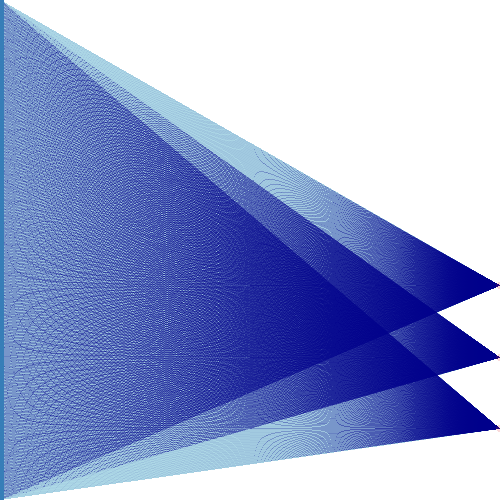

In [98]:
image = graphplot(nodes, connect_edges(nodes, edges), cat ='cat')
tf.Image(image)

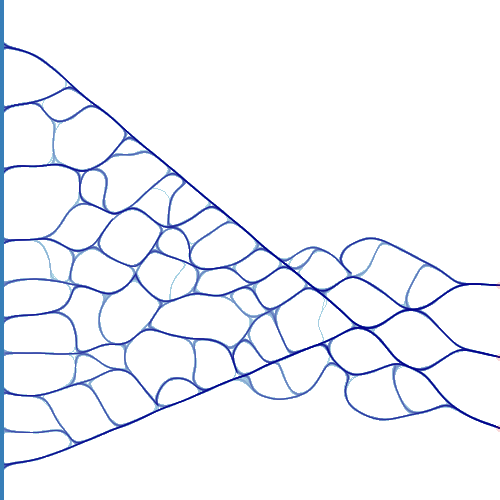

In [99]:
image = graphplot(nodes, hammer_bundle(nodes, edges), cat ='cat')
tf.Image(image)

По первому графику мы видим, что категории аварий равномерно распределяются по тяжести аварии. Мы видим три темно-синих конуса расположенных равномерно на концах ребер. Это является доказательством что в тяжести аварий нет закономерностей, любая категория аварий приносит разные варианты развития событий, да и в целом распределение равномерно, что говорит о нормальном распределении. Выходит в аварии нет аномальных ситуаций, каждая конкретная дорожная ситуация никак не связана с другой дорожной ситуацией, значит предположение о хорошей работе светофоров и их достаточном количестве подтверждается.

А теперь исследование.

И первое что я хочу сказать, это предисловие. Мы нашли большое количество данных, указывающих на то, что скорая помощь не всегда успевает вовремя успеть на место аварии, либо тяжесть аварий настолько велика что врачи просто не в состоянии помочь пострадавшим. Чтобы выяснить, в чем может крыться возможная причина, мы решили провести исследование и выяснить, насколько далеко от каждой потенциальной аварии находится скорая помощь? Сколько ей требуется время чтобы приехать на помощь людям, которые попали в аварию, и которым срочно нужна помощь врачей?  

Для этого мы преобразуем данные широты и долготы в градусы, минуты и секунды, и после всех преобразований посчитаем расстояние по "Формуле плоской Земли с полярными координатами".

Мы выясним где располагаются скорые помощи и сможем уже конкретно ответить на вопрос: в чем может состоять истинная причина описанной выше проблемы.

In [100]:
street = pd.DataFrame(columns = {'Адрес',  'Координаты улицы'})


street.loc[0, 'Адрес'] = 'Светлоярская улица, 1'
street.loc[0,'Координаты улицы'] = '56.350991, 43.835226'
street.loc[1, 'Адрес'] = 'улица Баранова, 22'
street.loc[1,'Координаты улицы'] = '56.335036, 43.843984'
street.loc[2, 'Адрес'] = 'Мещерский бульвар, 11'
street.loc[2,'Координаты улицы'] = '56.335316, 43.941478'
street.loc[3, 'Адрес'] = 'ул. Героя Фильченкова, 42'
street.loc[3,'Координаты улицы'] = '56.316674, 43.944766'
street.loc[4, 'Адрес'] = 'улица Мичурина, 1'
street.loc[4,'Координаты улицы'] = '56.301539, 43.942538'
street.loc[5, 'Адрес'] = 'Архитектурная улица, 8Б'
street.loc[5,'Координаты улицы'] = '56.281481, 43.945575'
street.loc[6, 'Адрес'] = 'Норильская улица, 14А'
street.loc[6,'Координаты улицы'] = '56.275369, 43.923988'
street.loc[7, 'Адрес'] = 'Памирская улица, 13'
street.loc[7,'Координаты улицы'] = '56.271660, 43.939799'
street.loc[8, 'Адрес'] = 'улица им. О. Чачиной, 24'
street.loc[8,'Координаты улицы'] = '56.309534, 44.008762'
street.loc[9, 'Адрес'] = 'Деловая улица, 11к1'
street.loc[9,'Координаты улицы'] = '56.305978, 44.068931'
street.loc[10, 'Адрес'] = 'улица имени Генерала И.Д. Ивлиева, 32к1'
street.loc[10,'Координаты улицы'] = '56.290914, 44.052304'
street.loc[11, 'Адрес'] = 'улица Петровского, 23'
street.loc[11,'Координаты улицы'] = '56.245120, 43.976279'
street.loc[12, 'Адрес'] = 'улица Героя Советского Союза Васильева, 66'
street.loc[12,'Координаты улицы'] = '56.271061, 43.893230'
street.loc[13, 'Адрес'] = 'Путейская улица, 56'
street.loc[13,'Координаты улицы'] = '56.296814, 43.871742'
street.loc[14, 'Адрес'] = 'Молодёжный проспект, 31к5'
street.loc[14,'Координаты улицы'] = '56.241029, 43.845691'
street.loc[15, 'Адрес'] = 'проспект Ильича, 5'
street.loc[15,'Координаты улицы'] = '56.244610, 43.862220'
street.loc[16, 'Адрес'] = 'Заводская улица, 15к7'
street.loc[16,'Координаты улицы'] = '56.281176, 43.948449'


street

,Адрес,Координаты улицы
0,"Светлоярская улица, 1","56.350991, 43.835226"
1,"улица Баранова, 22","56.335036, 43.843984"
2,"Мещерский бульвар, 11","56.335316, 43.941478"
3,"ул. Героя Фильченкова, 42","56.316674, 43.944766"
4,"улица Мичурина, 1","56.301539, 43.942538"
5,"Архитектурная улица, 8Б","56.281481, 43.945575"
6,"Норильская улица, 14А","56.275369, 43.923988"
7,"Памирская улица, 13","56.271660, 43.939799"
8,"улица им. О. Чачиной, 24","56.309534, 44.008762"
9,"Деловая улица, 11к1","56.305978, 44.068931"


Выше мы сохранили данные пунктов скорой помощи, используя данные Яндекс карт.

In [101]:
street_1 = pd.concat([street[['Адрес']], street['Координаты улицы'].str.split(', ', expand=True)], axis=1)
street_1

,Адрес,0,1
0,"Светлоярская улица, 1",56.350991,43.835226
1,"улица Баранова, 22",56.335036,43.843984
2,"Мещерский бульвар, 11",56.335316,43.941478
3,"ул. Героя Фильченкова, 42",56.316674,43.944766
4,"улица Мичурина, 1",56.301539,43.942538
5,"Архитектурная улица, 8Б",56.281481,43.945575
6,"Норильская улица, 14А",56.275369,43.923988
7,"Памирская улица, 13",56.271660,43.939799
8,"улица им. О. Чачиной, 24",56.309534,44.008762
9,"Деловая улица, 11к1",56.305978,44.068931


In [152]:
# map = folium.Map(location=[56.3287, 44.002], zoom_start = 11)

# lon = street_1[0]
# lat = street_1[1]
# add = street_1['Адрес']

# def the_elev(elev):
#     if(elev == 'Малахова, 179'):
#         return('pink')
#     else:
#         return('beige')

# for long,la,a in zip(lon,lat, add):
#     folium.Marker(location=[long,la], popup=str(a)+" m", icon=folium.Icon(color = the_elev(a))).add_to(map)

# folium.TileLayer('cartodbdark_matter').add_to(map)

# map

![Image_for_Europe](https://raw.githubusercontent.com/Hope122333/proj/main/bar/new_poligons/SaU9mKCRN8I.jpg)

In [103]:
result_99 = result.copy()

In [104]:
result_99['datetime'] = result_99['datetime'].astype('datetime64[Y]')

In [105]:
result_99 = result_99[result_99['datetime']> '2021-12-31']

In [106]:
result_99

,id,tags,light,point,nearby,region,scheme,address,weather,category,...,geometry,long,lat,lat_long,year,brand,color,model,machine_category,participants
0,2767224,Дорожно-транспортные происшествия,Светлое время суток,"{'lat': 56.267255, 'long': 43.914639}","[ ""Мост, эстакада, путепровод"", ""Административ...",Нижний новгород,110,"г Нижний Новгород, пр-кт Ленина, 70",Ясно,Столкновение,...,POINT (43.91464 56.26725),43.914639,56.267255,"56.267255,43.914639",2007,RENAULT,Черный,Symbol,"В-класс (малый) до 3,9 м","[{'role': 'Водитель', 'gender': 'Мужской', 'vi..."
1,2767288,Дорожно-транспортные происшествия,"В темное время суток, освещение включено","{'lat': 56.232635, 'long': 43.854986}","[ ""Многоквартирные жилые дома"", ""Регулируемый ...",Нижний новгород,780,"г Нижний Новгород, ул Лескова, 48",Пасмурно,Наезд на пешехода,...,POINT (43.85499 56.23264),43.854986,56.232635,"56.232635,43.854986",2007,VOLVO,Синий,XC90,"В-класс (малый) до 3,9 м","[{'role': 'Водитель', 'gender': 'Мужской', 'vi..."
2,2767298,Дорожно-транспортные происшествия,Светлое время суток,"{'lat': 56.229636, 'long': 43.963766}","[ ""Жилые дома индивидуальной застройки"" ]",Нижний новгород,830,"г Нижний Новгород, ул Маршала Голованова, 9",Ясно,Наезд на пешехода,...,POINT (43.96377 56.22964),43.963766,56.229636,"56.229636,43.963766",2010,HYUNDAI,Черный,Sonata,"С-класс (малый средний, компактный) до 4,3 м","[{'role': 'Водитель', 'gender': 'Мужской', 'vi..."
3,2767296,Дорожно-транспортные происшествия,Светлое время суток,"{'lat': 56.339082, 'long': 43.84488}","[ ""Регулируемый перекресток"", ""Регулируемый пе...",Нижний новгород,NaN,"г Нижний Новгород, ул Циолковского, 29",Ясно,Наезд на пешехода,...,POINT (43.84488 56.33908),43.844880,56.339082,"56.339082,43.84488",2008,TOYOTA,Иные цвета,RAV 4,"В-класс (малый) до 3,9 м","[{'role': 'Водитель', 'gender': 'Мужской', 'vi..."
4,2767299,Дорожно-транспортные происшествия,Светлое время суток,"{'lat': 56.287917, 'long': 43.981383}","[ ""АЗС"", ""Регулируемый перекресток"" ]",Нижний новгород,820,"г Нижний Новгород, пр-кт Гагарина, 58",Ясно,Наезд на пешехода,...,POINT (43.98138 56.28792),43.981383,56.287917,"56.287917,43.981383",2006,ГАЗ,Серый,2752 Соболь и модификации,Фургоны,"[{'role': 'Водитель', 'gender': 'Мужской', 'vi..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3437,2694889,Дорожно-транспортные происшествия,"В темное время суток, освещение включено","{'lat': 56.245943, 'long': 43.817468}","[ ""Остановка общественного транспорта"" ]",Нижний новгород,930,"г Нижний Новгород, пр-кт Молодежный, 80 1",Пасмурно,Наезд на препятствие,...,POINT (43.81747 56.24594),43.817468,56.245943,"56.245943,43.817468",2010,ВАЗ,Серый,Priora,"С-класс (малый средний, компактный) до 4,3 м","[{'role': 'Пассажир', 'gender': 'Мужской', 'vi..."
3438,2694803,Дорожно-транспортные происшествия,Светлое время суток,"{'lat': 56.318875, 'long': 43.946664}","[ ""Нерегулируемый перекрёсток равнозначных ули...",Нижний новгород,770,"г Нижний Новгород, ул Прокофьева, 44",Дождь,Наезд на пешехода,...,POINT (43.94666 56.31887),43.946664,56.318875,"56.318875,43.946664",2015,Прочие марки ТС,Серый,Прочие марки и модели ТС,"В-класс (малый) до 3,9 м","[{'role': 'Водитель', 'gender': 'Мужской', 'vi..."
3439,2694940,Дорожно-транспортные происшествия,Светлое время суток,"{'lat': 56.251838, 'long': 43.866123}","[ ""Многоквартирные жилые дома"", ""Регулируемый ...",Нижний новгород,300,"г Нижний Новгород, пр-кт Октября, 16",Ясно,Столкновение,...,POINT (43.86612 56.25184),43.866123,56.251838,"56.251838,43.866123",2014,NISSAN,Серый,Almera,"В-класс (малый) до 3,9 м","[{'role': 'Пассажир', 'gender': 'Женский', 'vi..."
3440,2695023,Дорожно-транспортные происшествия,"В темное время суток, освещение отсутствует","{'lat': 56.33502, 'long': 43.894286}",[ ],Нижний новгород,940,"г Нижний Новгород, ул Щербакова, 39В",Пасмурно,Наезд на препятствие,...,POINT (43.89429 56.33502),43.894286,56.335020,"56.33502,43.894286",2021,KIA,Серый,Rio,"В-класс (

In [107]:
result_99 = result_99[['lat', 'long', 'injured_count', 'dead_count']]
result_99.tail()

,lat,long,injured_count,dead_count
3437,56.245943,43.817468,2,0
3438,56.318875,43.946664,1,0
3439,56.251838,43.866123,2,0
3440,56.335020,43.894286,3,0
3441,56.337351,43.883418,1,0


In [108]:
result_99['degrees'] = result_99['lat']
result_99.loc[11,'lat']
l = 2
i = 1
w = 60

C:\Users\vikto\AppData\Local\Temp\ipykernel_10772\452337670.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [109]:
result_99

,lat,long,injured_count,dead_count,degrees
0,56.267255,43.914639,2,0,56.267255
1,56.232635,43.854986,1,0,56.232635
2,56.229636,43.963766,1,0,56.229636
3,56.339082,43.844880,1,0,56.339082
4,56.287917,43.981383,1,0,56.287917
...,...,...,...,...,...
3437,56.245943,43.817468,2,0,56.245943
3438,56.318875,43.946664,1,0,56.318875
3439,56.251838,43.866123,2,0,56.251838
3440,56.335020,43.894286,3,0,56.335020


In [110]:
for row,index in result_99.iterrows():
    a = result_99.loc[row, 'lat']
    s = str(a)
    x, b = s[:l], s[l:]
    x = int(x)
    result_99.loc[row,'lat_degrees_ac'] = x 
    n = b[i:]
    n2 = int(n) * w
    aa = str(n2)
    ss,m = aa[:l], aa[l:]
    ss = int(ss)
    result_99.loc[row,'lat_minutes_ac'] = ss
    j = int(m) * w
    ass = str(j)
    q,o = ass[:l], ass[l:]
    qo = q + '.' + o
    qo = float(qo)
    result_99.loc[row,'lat_secunds_ac'] = qo
    
    

C:\Users\vikto\AppData\Local\Temp\ipykernel_10772\218346908.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\vikto\AppData\Local\Temp\ipykernel_10772\218346908.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\vikto\AppData\Local\Temp\ipykernel_10772\218346908.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [111]:
result_99

,lat,long,injured_count,dead_count,degrees,lat_degrees_ac,lat_minutes_ac,lat_secunds_ac
0,56.267255,43.914639,2,0,56.267255,56.0,16.0,21.1800
1,56.232635,43.854986,1,0,56.232635,56.0,13.0,57.4860
2,56.229636,43.963766,1,0,56.229636,56.0,13.0,46.6896
3,56.339082,43.844880,1,0,56.339082,56.0,20.0,20.6952
4,56.287917,43.981383,1,0,56.287917,56.0,17.0,16.5012
...,...,...,...,...,...,...,...,...
3437,56.245943,43.817468,2,0,56.245943,56.0,14.0,45.3948
3438,56.318875,43.946664,1,0,56.318875,56.0,19.0,79.5000
3439,56.251838,43.866123,2,0,56.251838,56.0,15.0,66.1680
3440,56.335020,43.894286,3,0,56.335020,56.0,20.0,60.7200


In [112]:
for row,index in result_99.iterrows():
    a = result_99.loc[row, 'long']
    s = str(a)
    x, b = s[:l], s[l:]
    x = int(x)
    result_99.loc[row,'long_degrees_ac'] = x 
    n = b[i:]
    n2 = int(n) * w
    aa = str(n2)
    ss,m = aa[:l], aa[l:]
    ss = int(ss)
    result_99.loc[row,'long_minutes_ac'] = ss
    j = int(m) * w
    ass = str(j)
    q,o = ass[:l], ass[l:]
    qo = q + '.' + o
    qo = float(qo)
    result_99.loc[row,'long_secunds_ac'] = qo

C:\Users\vikto\AppData\Local\Temp\ipykernel_10772\2900035454.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\vikto\AppData\Local\Temp\ipykernel_10772\2900035454.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\vikto\AppData\Local\Temp\ipykernel_10772\2900035454.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

In [113]:
result_99

,lat,long,injured_count,dead_count,degrees,lat_degrees_ac,lat_minutes_ac,lat_secunds_ac,long_degrees_ac,long_minutes_ac,long_secunds_ac
0,56.267255,43.914639,2,0,56.267255,56.0,16.0,21.1800,43.0,54.0,52.7004
1,56.232635,43.854986,1,0,56.232635,56.0,13.0,57.4860,43.0,51.0,17.9496
2,56.229636,43.963766,1,0,56.229636,56.0,13.0,46.6896,43.0,57.0,49.5576
3,56.339082,43.844880,1,0,56.339082,56.0,20.0,20.6952,43.0,50.0,41.5680
4,56.287917,43.981383,1,0,56.287917,56.0,17.0,16.5012,43.0,58.0,52.9788
...,...,...,...,...,...,...,...,...,...,...,...
3437,56.245943,43.817468,2,0,56.245943,56.0,14.0,45.3948,43.0,49.0,28.8480
3438,56.318875,43.946664,1,0,56.318875,56.0,19.0,79.5000,43.0,56.0,47.9904
3439,56.251838,43.866123,2,0,56.251838,56.0,15.0,66.1680,43.0,51.0,58.0428
3440,56.335020,43.894286,3,0,56.335020,56.0,20.0,60.7200,43.0,53.0,39.4296


In [114]:
for row,index in street_1.iterrows():
    a = street_1.loc[row, 0]
    s = str(a)
    x, b = s[:l], s[l:]
    x = int(x)
    street_1.loc[row,'lat_degrees_fast'] = x 
    n = b[i:]
    n2 = int(n) * w
    aa = str(n2)
    ss,m = aa[:l], aa[l:]
    ss = int(ss)
    street_1.loc[row,'lat_minutes_fast'] = ss
    j = int(m) * w
    ass = str(j)
    q,o = ass[:l], ass[l:]
    qo = q + '.' + o
    qo = float(qo)
    street_1.loc[row,'lat_secunds_fast'] = qo

In [115]:
street_1

,Адрес,0,1,lat_degrees_fast,lat_minutes_fast,lat_secunds_fast
0,"Светлоярская улица, 1",56.350991,43.835226,56.0,21.0,35.6760
1,"улица Баранова, 22",56.335036,43.843984,56.0,20.0,61.2960
2,"Мещерский бульвар, 11",56.335316,43.941478,56.0,20.0,71.3760
3,"ул. Героя Фильченкова, 42",56.316674,43.944766,56.0,19.0,26.4000
4,"улица Мичурина, 1",56.301539,43.942538,56.0,18.0,55.4040
5,"Архитектурная улица, 8Б",56.281481,43.945575,56.0,16.0,53.3316
6,"Норильская улица, 14А",56.275369,43.923988,56.0,16.0,31.3284
7,"Памирская улица, 13",56.271660,43.939799,56.0,16.0,17.9760
8,"улица им. О. Чачиной, 24",56.309534,44.008762,56.0,18.0,34.3224
9,"Деловая улица, 11к1",56.305978,44.068931,56.0,18.0,21.5208


In [116]:
for row,index in street_1.iterrows():
    a = street_1.loc[row, 1]
    s = str(a)
    x, b = s[:l], s[l:]
    x = int(x)
    street_1.loc[row,'long_degrees_fast'] = x 
    n = b[i:]
    n2 = int(n) * w
    aa = str(n2)
    ss,m = aa[:l], aa[l:]
    ss = int(ss)
    street_1.loc[row,'long_minutes_fast'] = ss
    j = int(m) * w
    ass = str(j)
    q,o = ass[:l], ass[l:]
    qo = q + '.' + o
    qo = float(qo)
    street_1.loc[row,'long_secunds_fast'] = qo

In [117]:
street_1

,Адрес,0,1,lat_degrees_fast,lat_minutes_fast,lat_secunds_fast,long_degrees_fast,long_minutes_fast,long_secunds_fast
0,"Светлоярская улица, 1",56.350991,43.835226,56.0,21.0,35.6760,43.0,50.0,68.1360
1,"улица Баранова, 22",56.335036,43.843984,56.0,20.0,61.2960,43.0,50.0,38.3424
2,"Мещерский бульвар, 11",56.335316,43.941478,56.0,20.0,71.3760,43.0,56.0,29.3208
3,"ул. Героя Фильченкова, 42",56.316674,43.944766,56.0,19.0,26.4000,43.0,56.0,41.1576
4,"улица Мичурина, 1",56.301539,43.942538,56.0,18.0,55.4040,43.0,56.0,33.1368
5,"Архитектурная улица, 8Б",56.281481,43.945575,56.0,16.0,53.3316,43.0,56.0,44.0700
6,"Норильская улица, 14А",56.275369,43.923988,56.0,16.0,31.3284,43.0,55.0,26.3568
7,"Памирская улица, 13",56.271660,43.939799,56.0,16.0,17.9760,43.0,56.0,23.2764
8,"улица им. О. Чачиной, 24",56.309534,44.008762,56.0,18.0,34.3224,44.0,52.0,34.3200
9,"Деловая улица, 11к1",56.305978,44.068931,56.0,18.0,21.5208,44.0,41.0,21.5160


In [118]:
result_99.index = pd.RangeIndex(start=0, stop=len(result_99) , step=1)

In [119]:
result_99

,lat,long,injured_count,dead_count,degrees,lat_degrees_ac,lat_minutes_ac,lat_secunds_ac,long_degrees_ac,long_minutes_ac,long_secunds_ac
0,56.267255,43.914639,2,0,56.267255,56.0,16.0,21.1800,43.0,54.0,52.7004
1,56.232635,43.854986,1,0,56.232635,56.0,13.0,57.4860,43.0,51.0,17.9496
2,56.229636,43.963766,1,0,56.229636,56.0,13.0,46.6896,43.0,57.0,49.5576
3,56.339082,43.844880,1,0,56.339082,56.0,20.0,20.6952,43.0,50.0,41.5680
4,56.287917,43.981383,1,0,56.287917,56.0,17.0,16.5012,43.0,58.0,52.9788
...,...,...,...,...,...,...,...,...,...,...,...
1835,56.245943,43.817468,2,0,56.245943,56.0,14.0,45.3948,43.0,49.0,28.8480
1836,56.318875,43.946664,1,0,56.318875,56.0,19.0,79.5000,43.0,56.0,47.9904
1837,56.251838,43.866123,2,0,56.251838,56.0,15.0,66.1680,43.0,51.0,58.0428
1838,56.335020,43.894286,3,0,56.335020,56.0,20.0,60.7200,43.0,53.0,39.4296


In [120]:

o = result_99.loc[3,'lat_degrees_ac']
o2 = result_99.loc[3, 'lat_minutes_ac']
o3 = result_99.loc[3, 'lat_secunds_ac']

u = result_99.loc[3,'long_degrees_ac']
u2 = result_99.loc[3, 'long_minutes_ac']
u3 = result_99.loc[3, 'long_secunds_ac']

In [121]:
p = result_99.loc[1,'lat_degrees_ac']
p2 = result_99.loc[1, 'lat_minutes_ac']
p3 = result_99.loc[1, 'lat_secunds_ac']

e = result_99.loc[1,'long_degrees_ac']
e2 = result_99.loc[1, 'long_minutes_ac']
e3 = result_99.loc[1, 'long_secunds_ac']

In [122]:
pi = math.pi
pi

3.141592653589793

In [123]:
radius = 6372.795
street_1

,Адрес,0,1,lat_degrees_fast,lat_minutes_fast,lat_secunds_fast,long_degrees_fast,long_minutes_fast,long_secunds_fast
0,"Светлоярская улица, 1",56.350991,43.835226,56.0,21.0,35.6760,43.0,50.0,68.1360
1,"улица Баранова, 22",56.335036,43.843984,56.0,20.0,61.2960,43.0,50.0,38.3424
2,"Мещерский бульвар, 11",56.335316,43.941478,56.0,20.0,71.3760,43.0,56.0,29.3208
3,"ул. Героя Фильченкова, 42",56.316674,43.944766,56.0,19.0,26.4000,43.0,56.0,41.1576
4,"улица Мичурина, 1",56.301539,43.942538,56.0,18.0,55.4040,43.0,56.0,33.1368
5,"Архитектурная улица, 8Б",56.281481,43.945575,56.0,16.0,53.3316,43.0,56.0,44.0700
6,"Норильская улица, 14А",56.275369,43.923988,56.0,16.0,31.3284,43.0,55.0,26.3568
7,"Памирская улица, 13",56.271660,43.939799,56.0,16.0,17.9760,43.0,56.0,23.2764
8,"улица им. О. Чачиной, 24",56.309534,44.008762,56.0,18.0,34.3224,44.0,52.0,34.3200
9,"Деловая улица, 11к1",56.305978,44.068931,56.0,18.0,21.5208,44.0,41.0,21.5160


In [124]:
s = 60
ss = 3600
r = 180

m = []
distance =pd.DataFrame(columns = street_1['Адрес'])
distance

Адрес,"Светлоярская улица, 1","улица Баранова, 22","Мещерский бульвар, 11","ул. Героя Фильченкова, 42","улица Мичурина, 1","Архитектурная улица, 8Б","Норильская улица, 14А","Памирская улица, 13","улица им. О. Чачиной, 24","Деловая улица, 11к1","улица имени Генерала И.Д. Ивлиева, 32к1","улица Петровского, 23","улица Героя Советского Союза Васильева, 66","Путейская улица, 56","Молодёжный проспект, 31к5","проспект Ильича, 5","Заводская улица, 15к7"


А дальше мы просчитали расстояние между каждым пукнтом скорой помощи и аварией. Мы брали аварии только последнего года, поэтому данные наиболее актуальны.

In [125]:
for i in range(len(result_99)):
    for row,index in street_1.iterrows():
        a = result_99.loc[i, 'lat_degrees_ac']
        b = result_99.loc[i, 'lat_minutes_ac']
        c = result_99.loc[i, 'lat_secunds_ac']
        a1 = result_99.loc[i, 'long_degrees_ac']
        b1 = result_99.loc[i, 'long_minutes_ac']
        c1 = result_99.loc[i, 'long_secunds_ac']

        a2 = street_1.loc[row, 'lat_degrees_fast']
        b2 = street_1.loc[row, 'lat_minutes_fast']
        c2 = street_1.loc[row, 'lat_secunds_fast']
        a3 = street_1.loc[row, 'long_degrees_fast']
        b3 = street_1.loc[row, 'long_minutes_fast']
        c3 = street_1.loc[row, 'long_secunds_fast']

        t1 = (a+b/s+c/ss) * pi /r
        k1 = (a1+b1/s+c1/ss) * pi /r
        t2 = (a2+b2/s+c2/ss) * pi /r
        k2 = (a3+b3/s+b3/ss) * pi /r

        d = radius*math.acos(math.sin(t1) *\
        math.sin(t2) + math.cos(t1) * math.cos(t2) * math.cos(k1 - k2))

        
        distance.loc[i, index['Адрес']] = d
        

In [126]:
distance

Адрес,"Светлоярская улица, 1","улица Баранова, 22","Мещерский бульвар, 11","ул. Героя Фильченкова, 42","улица Мичурина, 1","Архитектурная улица, 8Б","Норильская улица, 14А","Памирская улица, 13","улица им. О. Чачиной, 24","Деловая улица, 11к1","улица имени Генерала И.Д. Ивлиева, 32к1","улица Петровского, 23","улица Героя Советского Союза Васильева, 66","Путейская улица, 56","Молодёжный проспект, 31к5","проспект Ильича, 5","Заводская улица, 15к7"
0,10.569289,9.602087,9.21156,6.100497,5.212831,2.336612,1.11375,2.11753,59.799291,48.298072,37.757692,5.198933,1.037478,3.4012,5.444334,4.402347,2.3224
1,14.164429,13.102878,14.604919,11.700032,10.878954,7.948281,6.723323,7.246215,63.947414,52.501774,41.911401,8.020192,5.034827,7.318525,1.049759,1.447785,7.925148
2,16.177144,15.23347,13.769768,10.535882,9.582245,5.839324,5.45351,4.763717,57.349682,45.939024,35.351881,2.084985,6.141412,9.04983,7.31506,6.378007,5.805826
3,2.321114,1.262691,6.599432,6.629187,6.934369,9.067758,8.892572,9.870405,63.992363,52.544443,42.313453,13.478733,8.2466,5.205484,10.907026,10.574991,9.091776
4,11.514534,10.803638,7.528424,4.486339,3.65491,2.130015,3.356415,2.700955,55.578649,44.07162,33.576389,4.76093,5.476107,6.267952,9.791611,8.696125,2.141662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1835,12.752219,11.696942,14.176476,11.583628,10.884946,8.630949,7.390672,8.189384,65.615457,54.139916,43.559839,9.77106,5.324919,6.645407,1.496586,2.44484,8.615493
1836,6.565305,6.264264,1.608627,1.646314,2.601866,6.371295,7.107895,7.463432,57.722441,46.281629,36.088543,10.650022,8.104267,6.173101,12.482762,11.643446,6.405211
1837,10.247093,9.192595,10.723563,8.022838,7.310267,5.314766,4.138706,5.124762,62.822739,51.323063,40.777203,7.657563,1.99464,3.295212,3.258597,2.64661,5.305585
1838,3.094835,2.900691,3.38123,4.452542,5.130913,8.352635,8.641335,9.362753,61.019933,49.605388,39.474138,12.900723,8.805406,5.993264,12.485292,11.890581,8.383695


In [127]:
for row,index in distance.iterrows():
    distance.loc[row,'min'] = distance.loc[row,:].min()

distance

Адрес,"Светлоярская улица, 1","улица Баранова, 22","Мещерский бульвар, 11","ул. Героя Фильченкова, 42","улица Мичурина, 1","Архитектурная улица, 8Б","Норильская улица, 14А","Памирская улица, 13","улица им. О. Чачиной, 24","Деловая улица, 11к1","улица имени Генерала И.Д. Ивлиева, 32к1","улица Петровского, 23","улица Героя Советского Союза Васильева, 66","Путейская улица, 56","Молодёжный проспект, 31к5","проспект Ильича, 5","Заводская улица, 15к7",min
0,10.569289,9.602087,9.21156,6.100497,5.212831,2.336612,1.11375,2.11753,59.799291,48.298072,37.757692,5.198933,1.037478,3.4012,5.444334,4.402347,2.3224,1.037478
1,14.164429,13.102878,14.604919,11.700032,10.878954,7.948281,6.723323,7.246215,63.947414,52.501774,41.911401,8.020192,5.034827,7.318525,1.049759,1.447785,7.925148,1.049759
2,16.177144,15.23347,13.769768,10.535882,9.582245,5.839324,5.45351,4.763717,57.349682,45.939024,35.351881,2.084985,6.141412,9.04983,7.31506,6.378007,5.805826,2.084985
3,2.321114,1.262691,6.599432,6.629187,6.934369,9.067758,8.892572,9.870405,63.992363,52.544443,42.313453,13.478733,8.2466,5.205484,10.907026,10.574991,9.091776,1.262691
4,11.514534,10.803638,7.528424,4.486339,3.65491,2.130015,3.356415,2.700955,55.578649,44.07162,33.576389,4.76093,5.476107,6.267952,9.791611,8.696125,2.141662,2.130015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1835,12.752219,11.696942,14.176476,11.583628,10.884946,8.630949,7.390672,8.189384,65.615457,54.139916,43.559839,9.77106,5.324919,6.645407,1.496586,2.44484,8.615493,1.496586
1836,6.565305,6.264264,1.608627,1.646314,2.601866,6.371295,7.107895,7.463432,57.722441,46.281629,36.088543,10.650022,8.104267,6.173101,12.482762,11.643446,6.405211,1.608627
1837,10.247093,9.192595,10.723563,8.022838,7.310267,5.314766,4.138706,5.124762,62.822739,51.323063,40.777203,7.657563,1.99464,3.295212,3.258597,2.64661,5.305585,1.994640
1838,3.094835,2.900691,3.38123,4.452542,5.130913,8.352635,8.641335,9.362753,61.019933,49.605388,39.474138,12.900723,8.805406,5.993264,12.485292,11.890581,8.383695,2.900691


Ниже мы отобрали самые близкие возможные пункты скорой помощи для каждой имеющейся на счету аварии.

In [128]:
result_97 = result_99[['injured_count', 'dead_count']]
result_97

,injured_count,dead_count
0,2,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
1835,2,0
1836,1,0
1837,2,0
1838,3,0


In [129]:
res = pd.concat([result_97, distance.reindex(result_97.index)], axis=1)
res

,injured_count,dead_count,"Светлоярская улица, 1","улица Баранова, 22","Мещерский бульвар, 11","ул. Героя Фильченкова, 42","улица Мичурина, 1","Архитектурная улица, 8Б","Норильская улица, 14А","Памирская улица, 13","улица им. О. Чачиной, 24","Деловая улица, 11к1","улица имени Генерала И.Д. Ивлиева, 32к1","улица Петровского, 23","улица Героя Советского Союза Васильева, 66","Путейская улица, 56","Молодёжный проспект, 31к5","проспект Ильича, 5","Заводская улица, 15к7",min
0,2,0,10.569289,9.602087,9.21156,6.100497,5.212831,2.336612,1.11375,2.11753,59.799291,48.298072,37.757692,5.198933,1.037478,3.4012,5.444334,4.402347,2.3224,1.037478
1,1,0,14.164429,13.102878,14.604919,11.700032,10.878954,7.948281,6.723323,7.246215,63.947414,52.501774,41.911401,8.020192,5.034827,7.318525,1.049759,1.447785,7.925148,1.049759
2,1,0,16.177144,15.23347,13.769768,10.535882,9.582245,5.839324,5.45351,4.763717,57.349682,45.939024,35.351881,2.084985,6.141412,9.04983,7.31506,6.378007,5.805826,2.084985
3,1,0,2.321114,1.262691,6.599432,6.629187,6.934369,9.067758,8.892572,9.870405,63.992363,52.544443,42.313453,13.478733,8.2466,5.205484,10.907026,10.574991,9.091776,1.262691
4,1,0,11.514534,10.803638,7.528424,4.486339,3.65491,2.130015,3.356415,2.700955,55.578649,44.07162,33.576389,4.76093,5.476107,6.267952,9.791611,8.696125,2.141662,2.130015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1835,2,0,12.752219,11.696942,14.176476,11.583628,10.884946,8.630949,7.390672,8.189384,65.615457,54.139916,43.559839,9.77106,5.324919,6.645407,1.496586,2.44484,8.615493,1.496586
1836,1,0,6.565305,6.264264,1.608627,1.646314,2.601866,6.371295,7.107895,7.463432,57.722441,46.281629,36.088543,10.650022,8.104267,6.173101,12.482762,11.643446,6.405211,1.608627
1837,2,0,10.247093,9.192595,10.723563,8.022838,7.310267,5.314766,4.138706,5.124762,62.822739,51.323063,40.777203,7.657563,1.99464,3.295212,3.258597,2.64661,5.305585,1.994640
1838,3,0,3.094835,2.900691,3.38123,4.452542,5.130913,8.352635,8.641335,9.362753,61.019933,49.605388,39.474138,12.900723,8.805406,5.993264,12.485292,11.890581,8.383695,2.900691


Мы выбрали минимальные и максимальные расстояния, они описаны в километрах и дальше также.

In [130]:
max_min = res[['injured_count', 'dead_count', 'min']].sort_values(by = 'min',ascending = False).reset_index().head(120)
max_min

,index,injured_count,dead_count,min
0,423,1,0,143.094042
1,1237,1,0,141.001201
2,584,1,0,48.026120
3,1000,1,0,47.914738
4,515,1,0,44.318823
...,...,...,...,...
115,622,1,0,14.303329
116,623,1,0,14.181691
117,232,1,0,14.171426
118,1216,1,0,14.089589


In [131]:
min_min = res[['injured_count', 'dead_count', 'min']].sort_values(by = 'min',ascending = True).reset_index().head(120)
min_min

,index,injured_count,dead_count,min
0,910,2,0,0.033680
1,107,1,0,0.037720
2,549,1,0,0.070856
3,303,1,0,0.073239
4,445,1,0,0.078541
...,...,...,...,...
115,1834,2,0,0.488813
116,1693,1,0,0.489208
117,1334,2,0,0.489773
118,51,1,0,0.490378


Мы решили определить,как возможно связаны между собой количество смертей и раненых с удаленностью от пукнтов скорой помощи.

In [132]:
sum_max_min_injured = max_min['injured_count'].sum()
sum_max_min_dead = max_min['dead_count'].sum()


In [133]:
sum_min_min_injured = min_min['injured_count'].sum()
sum_min_min_dead = min_min['dead_count'].sum()

Визуализировали наши труды.

In [161]:
# fig = go.Figure(
#     data=
#     [go.Bar(
#         name="Более 2000 аварий",
#         y=[sum_max_min_injured,sum_max_min_dead,sum_min_min_injured,sum_min_min_dead],
#         x = ['Раненые вдали', 'Умершие вдали', 'Раненые вблизи', 'Умершие вблизи'],
#         marker_color="LightSkyBlue")],
#      layout=go.Layout(
#         title="Умершие/раненые",
#         yaxis_title="Количество аварий"))
     
# fig.update_layout(height = 800)
# fig.show()  

![Image_for_Europe](https://raw.githubusercontent.com/Hope122333/proj/main/bar/new_poligons/QQ0mdJNgoRM.jpg)

In [135]:
distanc = distance.copy()
distanc = distanc.drop('min', axis = 1)
ms = []

Мы подумали, что также будет очень интересно понять, на каких улицах, где распологались пункты спасения, чаще происходили аварии. Возможно, это даже связано.. 

In [136]:
for row,index in distanc.iterrows():
    minn = distanc.loc[row,:].min()
    n = distanc.loc[row,:] == minn
    n.columns = ['Адрес', 'count']
    df = pd.DataFrame({'Адрес':n.index, 'Сост':n.values})
    tr = df[df['Сост']==True].iloc[0,0]
    ms.append(tr)
ms

['улица Героя Советского Союза Васильева, 66',
 'Молодёжный проспект, 31к5',
 'улица Петровского, 23',
 'улица Баранова, 22',
 'Архитектурная улица, 8Б',
 'Памирская улица, 13',
 'Архитектурная улица, 8Б',
 'Норильская улица, 14А',
 'улица имени Генерала И.Д. Ивлиева, 32к1',
 'Путейская улица, 56',
 'улица имени Генерала И.Д. Ивлиева, 32к1',
 'проспект Ильича, 5',
 'улица имени Генерала И.Д. Ивлиева, 32к1',
 'улица Героя Советского Союза Васильева, 66',
 'улица Героя Советского Союза Васильева, 66',
 'улица Мичурина, 1',
 'ул. Героя Фильченкова, 42',
 'Деловая улица, 11к1',
 'ул. Героя Фильченкова, 42',
 'улица Петровского, 23',
 'улица Героя Советского Союза Васильева, 66',
 'улица имени Генерала И.Д. Ивлиева, 32к1',
 'улица имени Генерала И.Д. Ивлиева, 32к1',
 'Памирская улица, 13',
 'Светлоярская улица, 1',
 'Деловая улица, 11к1',
 'Молодёжный проспект, 31к5',
 'улица Баранова, 22',
 'ул. Героя Фильченкова, 42',
 'Норильская улица, 14А',
 'Молодёжный проспект, 31к5',
 'ул. Героя Фил

In [137]:
df_ms = pd.DataFrame(ms)
df_ms[1] = 1
df_ms

,0,1
0,"улица Героя Советского Союза Васильева, 66",1
1,"Молодёжный проспект, 31к5",1
2,"улица Петровского, 23",1
3,"улица Баранова, 22",1
4,"Архитектурная улица, 8Б",1
...,...,...
1835,"Молодёжный проспект, 31к5",1
1836,"Мещерский бульвар, 11",1
1837,"улица Героя Советского Союза Васильева, 66",1
1838,"улица Баранова, 22",1


In [138]:
count_streets = df_ms.groupby(0)[1].count().reset_index().sort_values(by = 1, ascending = False)
count_streets_2 = count_streets.head(4)
count_streets_3 = count_streets.tail(6)
count_streets

,0,1
10,"ул. Героя Фильченкова, 42",184
11,"улица Баранова, 22",177
4,"Молодёжный проспект, 31к5",169
13,"улица Мичурина, 1",161
16,"улица имени Генерала И.Д. Ивлиева, 32к1",160
9,"проспект Ильича, 5",143
14,"улица Петровского, 23",134
8,"Светлоярская улица, 1",125
7,"Путейская улица, 56",112
0,"Архитектурная улица, 8Б",92


Мы определили, что чаще всего аварии происходили рядом с пунктом скорой помощи на улице Героя Фильченкова. И чуть ниже мы это отобразили.

In [139]:
count_streets.index = pd.RangeIndex(start=0, stop=17 , step=1)

In [140]:
count_streets = count_streets.rename(columns={0:"Адрес", 1:"Количество аварий"})

In [141]:
street

,Адрес,Координаты улицы
0,"Светлоярская улица, 1","56.350991, 43.835226"
1,"улица Баранова, 22","56.335036, 43.843984"
2,"Мещерский бульвар, 11","56.335316, 43.941478"
3,"ул. Героя Фильченкова, 42","56.316674, 43.944766"
4,"улица Мичурина, 1","56.301539, 43.942538"
5,"Архитектурная улица, 8Б","56.281481, 43.945575"
6,"Норильская улица, 14А","56.275369, 43.923988"
7,"Памирская улица, 13","56.271660, 43.939799"
8,"улица им. О. Чачиной, 24","56.309534, 44.008762"
9,"Деловая улица, 11к1","56.305978, 44.068931"


In [142]:
street_1 = pd.concat([street[['Адрес']], street['Координаты улицы'].str.split(', ', expand=True)], axis=1)


In [143]:
count_streets

,Адрес,Количество аварий
0,"ул. Героя Фильченкова, 42",184
1,"улица Баранова, 22",177
2,"Молодёжный проспект, 31к5",169
3,"улица Мичурина, 1",161
4,"улица имени Генерала И.Д. Ивлиева, 32к1",160
5,"проспект Ильича, 5",143
6,"улица Петровского, 23",134
7,"Светлоярская улица, 1",125
8,"Путейская улица, 56",112
9,"Архитектурная улица, 8Б",92


In [144]:
result_num = pd.merge(count_streets, street_1, on="Адрес")
result_num = result_num.rename(columns={0:"lat", 1:"long"})

In [145]:
result_num

,Адрес,Количество аварий,lat,long
0,"ул. Героя Фильченкова, 42",184,56.316674,43.944766
1,"улица Баранова, 22",177,56.335036,43.843984
2,"Молодёжный проспект, 31к5",169,56.241029,43.845691
3,"улица Мичурина, 1",161,56.301539,43.942538
4,"улица имени Генерала И.Д. Ивлиева, 32к1",160,56.290914,44.052304
5,"проспект Ильича, 5",143,56.244610,43.862220
6,"улица Петровского, 23",134,56.245120,43.976279
7,"Светлоярская улица, 1",125,56.350991,43.835226
8,"Путейская улица, 56",112,56.296814,43.871742
9,"Архитектурная улица, 8Б",92,56.281481,43.945575


Мы добавили координаты улиц а ниже визуализировали количество аварий по улицам.

In [154]:
# map = folium.Map(location=[ 56.3287, 44.002], zoom_start = 11)

# lon = result_num['lat']
# lat = result_num['long']
# elev = result_num["Количество аварий"]
# addr = result_num["Адрес"]

# def the_elev(elev):
#     if(elev > 80 ):
#         return('red')
#     elif(elev < 80 and elev > 40):
#         return('orange')
#     else:
#         return('beige')

# for long,la,a,el in zip(lon,lat,addr,elev):
#     folium.Marker(location=[long,la],radius = 10,popup=str(a) + " Количество аварий: "+str(el),  icon=folium.Icon(the_elev(el), fill_opacity = 0.9)).add_to(map)

# folium.TileLayer('cartodbdark_matter').add_to(map)

# map

![Image_for_Europe](https://raw.githubusercontent.com/Hope122333/proj/main/bar/new_poligons/4YY7XML0epU.jpg)

In [156]:
# lat = result_num['lat']
# lon = result_num['long']
# elevation = result_num["Количество аварий"]
# addr = result_num["Адрес"]

# def color_change(elev):
#      if(elev > 80 ):
#         return('red')
#      elif(elev < 80 and elev > 40):
#         return('orange')
#      else:
#         return('beige')
# map = folium.Map(location=[56.3287, 44.002], zoom_start = 11)

# for lat, lon, elevation, a in zip(lat, lon, elevation, addr):
#     folium.CircleMarker(location=[lat, lon], radius = 9, popup = str(a) + " Количество аварий: " + str(elevation), fill_color=color_change(elevation), color="gray", fill_opacity = 0.9).add_to(map)


# folium.TileLayer('Stamen Terrain').add_to(map)

# map

![Image_for_Europe](https://raw.githubusercontent.com/Hope122333/proj/main/bar/new_poligons/QhrdvlPsoZQ.jpg)

## Общий вывод

Ну вот такое небольшое но захватывающее исследование мы провели сегодня.  
Мы выяснили что до приезда скорой помощи умирает 57 процентов людей из всех умерших. Это 68 людей из 118, которые умерли уже после, из за осложнений после тяжелого ДТП. Но не смотря на это большинство людей остается живы: это 20 070 человек, из которых 12 548 человек даже не постарадали. Что уже прекрасно!

Как мы смогли увидеть , в городе Нижний Новгород отлично проработана система логистики скорой помощи,хотя существуют некоторые пробелы, например, мы можем увидеть, что там , где количество пунктов скорой помощи ниже, количество аварий увеличивается. Но с другой стороны, такое положение вещей доказывает, что наличие плотного количества пунктов скорой помощи в середине города, приводит к уменьшению нагрузки на определенные пункты скорой помощи, а также уменьшает количество смертей, среди попавших в ДТП людей.

  *Наше исследование погибших и спасенных также доказывает, что аварии вблизи решаются с большим количеством летальных исходов.*
  
Мы смогли также установить, что количество пунктов скорой помощи улучшает состояние нагруженности потому что есть два пункта скорой помощи, которые расположены очень близко друг к другу, и это скорая помощь с улицы Заводская, 15к7 и с улицы Архитектурная, 8В. Наличие двух пунктов вблизи уменьшает нагрузку на один из пунктов и делает ее минимальной, именно поэтому мы рекомендовали бы и дальше развивать логистику скорой помощи, чтобы снижать количество аварий на каждую скорую помощь и увеличивать вероятность выживания среди постарадавших.
 
 *Раненых вблизи людей оказалось также больше, чем раненых вдали.*
 
 Что позволяет сделать вывод о том, что логистика не самая главная проблема в Нижнем Новгороде, показатели на графике по "раненым/умершим", показывает, что дело обстоит не совсем так как хотелось бы. Само количество раненых среди попавших в ДТП говорит о минимальной безопасности на дорогах Нижнего Новгорода. Если врачи не могут спасти людей, которые находятся рядом с их выездным пунктом, то это может говорить либо о халатности всех врачей и водителей неотложной помощи, либо общей небезопасности на дорогах Нижнего Новгорода.  Стоит более внимательно отнестись к этому вопросу, ведь это благосостояние наших граждан. 